In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil import parser
import folium

In [2]:
from ziptolatlong import zipToLatLong

In [3]:
pd.set_option('display.max_rows', 250)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
from sqlalchemy import create_engine
engine = create_engine(f'postgresql://will:az@localhost:5432/cars')

In [5]:
connection = engine.connect()
res = connection.execute('SELECT * FROM car_sales').fetchall()

In [6]:
furk = pd.read_csv('first dealership.csv')
furk.columns

Index(['askprice', 'brandname', 'modelname', 'year', 'mileage', 'datelisted',
       'datesold', 'engineconfiguration', 'enginecylinders', 'enginehp',
       'baseprice', 'zipcode', 'dealerid'],
      dtype='object')

In [31]:
colorado_cars_df = pd.DataFrame(res, columns=furk.columns)

In [25]:
colorado_cars_df

,askprice,brandname,modelname,year,mileage,datelisted,datesold,engineconfiguration,enginecylinders,enginehp,baseprice,zipcode,dealerid
0,19999.0,TOYOTA,TUNDRA,2013,82210.0,2022-04-15 00:00:00,2022-04-15 00:00:00,V-Shaped,8.0,381.0,0.0,80920,8435
1,14989.0,FORD,RANGER,2010,183070.0,2022-04-15 00:00:00,2022-04-15 00:00:00,V-Shaped,6.0,207.0,0.0,80920,8435
2,11995.0,VOLVO,XC90,2012,155521.0,2022-04-12 00:00:00,2022-04-14 00:00:00,0.0,6.0,240.0,0.0,80920,8435
3,4697.0,TOYOTA,PRIUS,2005,221568.0,2022-04-10 00:00:00,2022-04-12 00:00:00,In-Line,4.0,76.0,0.0,80920,8435
4,5697.0,KIA,SPORTAGE,2006,0.0,2022-04-10 00:00:00,2022-04-14 00:00:00,0.0,0.0,0.0,0.0,80920,8435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177224,36981.0,ALFA ROMEO,GIULIA (952),2020,9969.0,2022-03-06 00:00:00,2022-04-11 00:00:00,In-Line,4.0,280.0,39345.0,80129,34944
177225,135981.0,LAND ROVER,RANGE ROVER SPORT,2020,11291.0,2022-03-05 00:00:00,2022-03-09 00:00:00,V-Shaped,8.0,575.0,0.0,80129,34944
177226,97981.0,DODGE,CHARGER,2021,3823.0,2022-03-04 00:00:00,2022-03-31 00:00:00,V-Shaped,8.0,707.0,0.0,80129,34944
177227,63981.0,BMW,M550I,2019,17894.0,2022-03-02 00:00:00,2022-03-25 00:00:00,0.0,8.0,455.0,0.0,80129,34944


In [17]:
for col in colorado_cars_df:
    nullBasePriceMask = colorado_cars_df[col].isnull()
    colorado_cars_df.loc[nullBasePriceMask, col] = 0.0

In [22]:
cars_with_base_price = colorado_cars_df[colorado_cars_df['baseprice'] != 0].copy()
more_than_msrp = colorado_cars_df[(colorado_cars_df['askprice'] > colorado_cars_df['baseprice']) & (colorado_cars_df['baseprice'] != 0)].copy()
more_than_msrp

,askprice,brandname,modelname,year,mileage,datelisted,datesold,engineconfiguration,enginecylinders,enginehp,baseprice,zipcode,dealerid
15,31000.0,SUBARU,CROSSTREK,2019,33533.0,2022-04-06 00:00:00,2022-04-13 00:00:00,0.0,4.0,152.0,27195.0,80920,8435
39,47989.0,HYUNDAI,PALISADE,2020,42161.0,2022-04-02 00:00:00,2022-04-06 00:00:00,0.0,0.0,0.0,44700.0,80920,8435
46,30798.0,TOYOTA,RAV4,2019,38940.0,2022-04-01 00:00:00,2022-04-13 00:00:00,In-Line,4.0,203.0,25650.0,80920,8435
57,26999.0,JEEP,CHEROKEE,2019,20221.0,2022-03-31 00:00:00,2022-04-04 00:00:00,In-Line,4.0,184.0,25740.0,80920,8435
61,59995.0,FORD,F-250,2017,17337.0,2022-03-30 00:00:00,2022-04-12 00:00:00,V-Shaped,8.0,440.0,39135.0,80920,8435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177203,28992.0,VOLKSWAGEN,TIGUAN,2018,16434.0,2022-03-16 00:00:00,2022-03-16 00:00:00,0.0,4.0,184.0,28050.0,80129,34944
177212,30994.0,SUBARU,FORESTER,2019,39069.0,2022-03-12 00:00:00,2022-03-21 00:00:00,0.0,4.0,182.0,26695.0,80129,34944
177214,59981.0,LAND ROVER,RANGE ROVER VELAR,2019,21537.0,2022-03-07 00:00:00,2022-03-21 00:00:00,In-Line,4.0,247.0,59000.0,80129,34944
177219,44981.0,ALFA ROMEO,STELVIO,2020,16825.0,2022-03-06 00:00:00,2022-04-12 00:00:00,In-Line,4.0,280.0,42640.0,80129,34944


In [23]:
(more_than_msrp.shape[0] / cars_with_base_price.shape[0]) * 100

29.47800298793676

In [26]:
cars_with_base_price

,askprice,brandname,modelname,year,mileage,datelisted,datesold,engineconfiguration,enginecylinders,enginehp,baseprice,zipcode,dealerid
15,31000.0,SUBARU,CROSSTREK,2019,33533.0,2022-04-06 00:00:00,2022-04-13 00:00:00,0.0,4.0,152.0,27195.0,80920,8435
24,14999.0,FORD,FOCUS,2017,79650.0,2022-04-05 00:00:00,2022-04-13 00:00:00,In-Line,4.0,160.0,21675.0,80920,8435
39,47989.0,HYUNDAI,PALISADE,2020,42161.0,2022-04-02 00:00:00,2022-04-06 00:00:00,0.0,0.0,0.0,44700.0,80920,8435
46,30798.0,TOYOTA,RAV4,2019,38940.0,2022-04-01 00:00:00,2022-04-13 00:00:00,In-Line,4.0,203.0,25650.0,80920,8435
57,26999.0,JEEP,CHEROKEE,2019,20221.0,2022-03-31 00:00:00,2022-04-04 00:00:00,In-Line,4.0,184.0,25740.0,80920,8435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177220,43992.0,BMW,X5,2018,41762.0,2022-03-06 00:00:00,2022-04-01 00:00:00,0.0,6.0,300.0,59500.0,80129,34944
177222,37981.0,ALFA ROMEO,GIULIA (952),2020,15785.0,2022-03-06 00:00:00,2022-04-09 00:00:00,In-Line,4.0,280.0,39345.0,80129,34944
177223,36981.0,ALFA ROMEO,GIULIA (952),2020,15082.0,2022-03-06 00:00:00,2022-03-24 00:00:00,In-Line,4.0,280.0,39345.0,80129,34944
177224,36981.0,ALFA ROMEO,GIULIA (952),2020,9969.0,2022-03-06 00:00:00,2022-04-11 00:00:00,In-Line,4.0,280.0,39345.0,80129,34944


In [24]:
np.mean(more_than_msrp['mileage'])

24772.746142208776

In [14]:
teslas = colorado_cars_df[(colorado_cars_df['brandname'] == "TESLA") & (colorado_cars_df['baseprice'] > 0)]

np.mean(teslas['baseprice'] - teslas['askprice'])

5884.360360360361

In [8]:
colorado_cars_df['brandname'].value_counts()

FORD                                                  24116
TOYOTA                                                20225
CHEVROLET                                             14375
SUBARU                                                13447
JEEP                                                  12539
NISSAN                                                10846
HONDA                                                  7497
VOLKSWAGEN                                             6919
RAM                                                    6790
MERCEDES-BENZ                                          6261
GMC                                                    6147
DODGE                                                  5756
HYUNDAI                                                5243
AUDI                                                   5127
KIA                                                    3784
MAZDA                                                  3752
BMW                                     

In [15]:
nullBasePriceMask = colorado_cars_df['baseprice'].isnull()
colorado_cars_df.loc[nullBasePriceMask, 'baseprice'] = 0.0

In [16]:
colorado_cars_df.dtypes

askprice                       object
brandname                      object
modelname                      object
year                            int64
mileage                        object
datelisted             datetime64[ns]
datesold               datetime64[ns]
engineconfiguration            object
enginecylinders                object
enginehp                       object
baseprice                      object
zipcode                         int64
dealerid                        int64
dtype: object

In [11]:
for col in colorado_cars_df:
    print(colorado_cars_df[col].isna().value_counts(normalize=True))

False    1.0
Name: askprice, dtype: float64
False    1.0
Name: brandname, dtype: float64
False    0.997523
True     0.002477
Name: modelname, dtype: float64
False    1.0
Name: year, dtype: float64
False    1.0
Name: mileage, dtype: float64
False    1.0
Name: datelisted, dtype: float64
False    1.0
Name: datesold, dtype: float64
False    0.581677
True     0.418323
Name: engineconfiguration, dtype: float64
False    0.884517
True     0.115483
Name: enginecylinders, dtype: float64
False    0.60006
True     0.39994
Name: enginehp, dtype: float64
False    1.0
Name: baseprice, dtype: float64
False    1.0
Name: zipcode, dtype: float64
False    1.0
Name: dealerid, dtype: float64


In [54]:
for col in colorado_cars_df:
    print(colorado_cars_df[col].isnull().value_counts(normalize=True))

False    1.0
Name: askprice, dtype: float64
False    1.0
Name: brandname, dtype: float64
False    0.997523
True     0.002477
Name: modelname, dtype: float64
False    1.0
Name: year, dtype: float64
False    1.0
Name: mileage, dtype: float64
False    1.0
Name: datelisted, dtype: float64
False    1.0
Name: datesold, dtype: float64
False    1.0
Name: engineconfiguration, dtype: float64
False    0.884517
True     0.115483
Name: enginecylinders, dtype: float64
False    0.60006
True     0.39994
Name: enginehp, dtype: float64
False    1.0
Name: baseprice, dtype: float64
False    1.0
Name: zipcode, dtype: float64
False    1.0
Name: dealerid, dtype: float64


In [12]:
colorado_cars_df.dropna(subset=['brandname'],axis=0)

,askprice,brandname,modelname,year,mileage,datelisted,datesold,engineconfiguration,enginecylinders,enginehp,baseprice,zipcode,dealerid
0,19999.0,TOYOTA,TUNDRA,2013,82210.0,2022-04-15,2022-04-15,V-Shaped,8.0,381.0,0.0,80920,8435
1,14989.0,FORD,RANGER,2010,183070.0,2022-04-15,2022-04-15,V-Shaped,6.0,207.0,0.0,80920,8435
2,11995.0,VOLVO,XC90,2012,155521.0,2022-04-12,2022-04-14,None,6.0,240.0,0.0,80920,8435
3,4697.0,TOYOTA,PRIUS,2005,221568.0,2022-04-10,2022-04-12,In-Line,4.0,76.0,0.0,80920,8435
4,5697.0,KIA,SPORTAGE,2006,0.0,2022-04-10,2022-04-14,None,None,None,0.0,80920,8435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177224,36981.0,ALFA ROMEO,GIULIA (952),2020,9969.0,2022-03-06,2022-04-11,In-Line,4.0,280.0,39345.0,80129,34944
177225,135981.0,LAND ROVER,RANGE ROVER SPORT,2020,11291.0,2022-03-05,2022-03-09,V-Shaped,8.0,575.0,0.0,80129,34944
177226,97981.0,DODGE,CHARGER,2021,3823.0,2022-03-04,2022-03-31,V-Shaped,8.0,707.0,0.0,80129,34944
177227,63981.0,BMW,M550I,2019,17894.0,2022-03-02,2022-03-25,None,8.0,455.0,0.0,80129,34944


In [32]:
colorado_cars_df['engineconfiguration']

0         V-Shaped
1         V-Shaped
2             None
3          In-Line
4             None
            ...   
177224     In-Line
177225    V-Shaped
177226    V-Shaped
177227        None
177228        None
Name: engineconfiguration, Length: 177229, dtype: object

In [33]:
colorado_cars_df['askprice'] = colorado_cars_df['askprice'].astype(float)
colorado_cars_df['mileage'] = colorado_cars_df['mileage'].astype(float)
colorado_cars_df['enginehp'] = colorado_cars_df['enginehp'].astype(float)
colorado_cars_df['baseprice'] = colorado_cars_df['baseprice'].astype(float)
colorado_cars_df['enginecylinders'] = colorado_cars_df['enginecylinders'].astype(float)

In [34]:
colorado_cars_df.loc[colorado_cars_df['engineconfiguration'].isnull(), 'engineconfiguration'] = '-'

In [35]:
clean_df = colorado_cars_df.dropna().copy()

In [36]:
clean_df

,askprice,brandname,modelname,year,mileage,datelisted,datesold,engineconfiguration,enginecylinders,enginehp,baseprice,zipcode,dealerid
15,31000.0,SUBARU,CROSSTREK,2019,33533.0,2022-04-06,2022-04-13,-,4.0,152.0,27195.0,80920,8435
24,14999.0,FORD,FOCUS,2017,79650.0,2022-04-05,2022-04-13,In-Line,4.0,160.0,21675.0,80920,8435
46,30798.0,TOYOTA,RAV4,2019,38940.0,2022-04-01,2022-04-13,In-Line,4.0,203.0,25650.0,80920,8435
57,26999.0,JEEP,CHEROKEE,2019,20221.0,2022-03-31,2022-04-04,In-Line,4.0,184.0,25740.0,80920,8435
61,59995.0,FORD,F-250,2017,17337.0,2022-03-30,2022-04-12,V-Shaped,8.0,440.0,39135.0,80920,8435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177224,36981.0,ALFA ROMEO,GIULIA (952),2020,9969.0,2022-03-06,2022-04-11,In-Line,4.0,280.0,39345.0,80129,34944
177225,135981.0,LAND ROVER,RANGE ROVER SPORT,2020,11291.0,2022-03-05,2022-03-09,V-Shaped,8.0,575.0,0.0,80129,34944
177226,97981.0,DODGE,CHARGER,2021,3823.0,2022-03-04,2022-03-31,V-Shaped,8.0,707.0,0.0,80129,34944
177227,63981.0,BMW,M550I,2019,17894.0,2022-03-02,2022-03-25,-,8.0,455.0,0.0,80129,34944


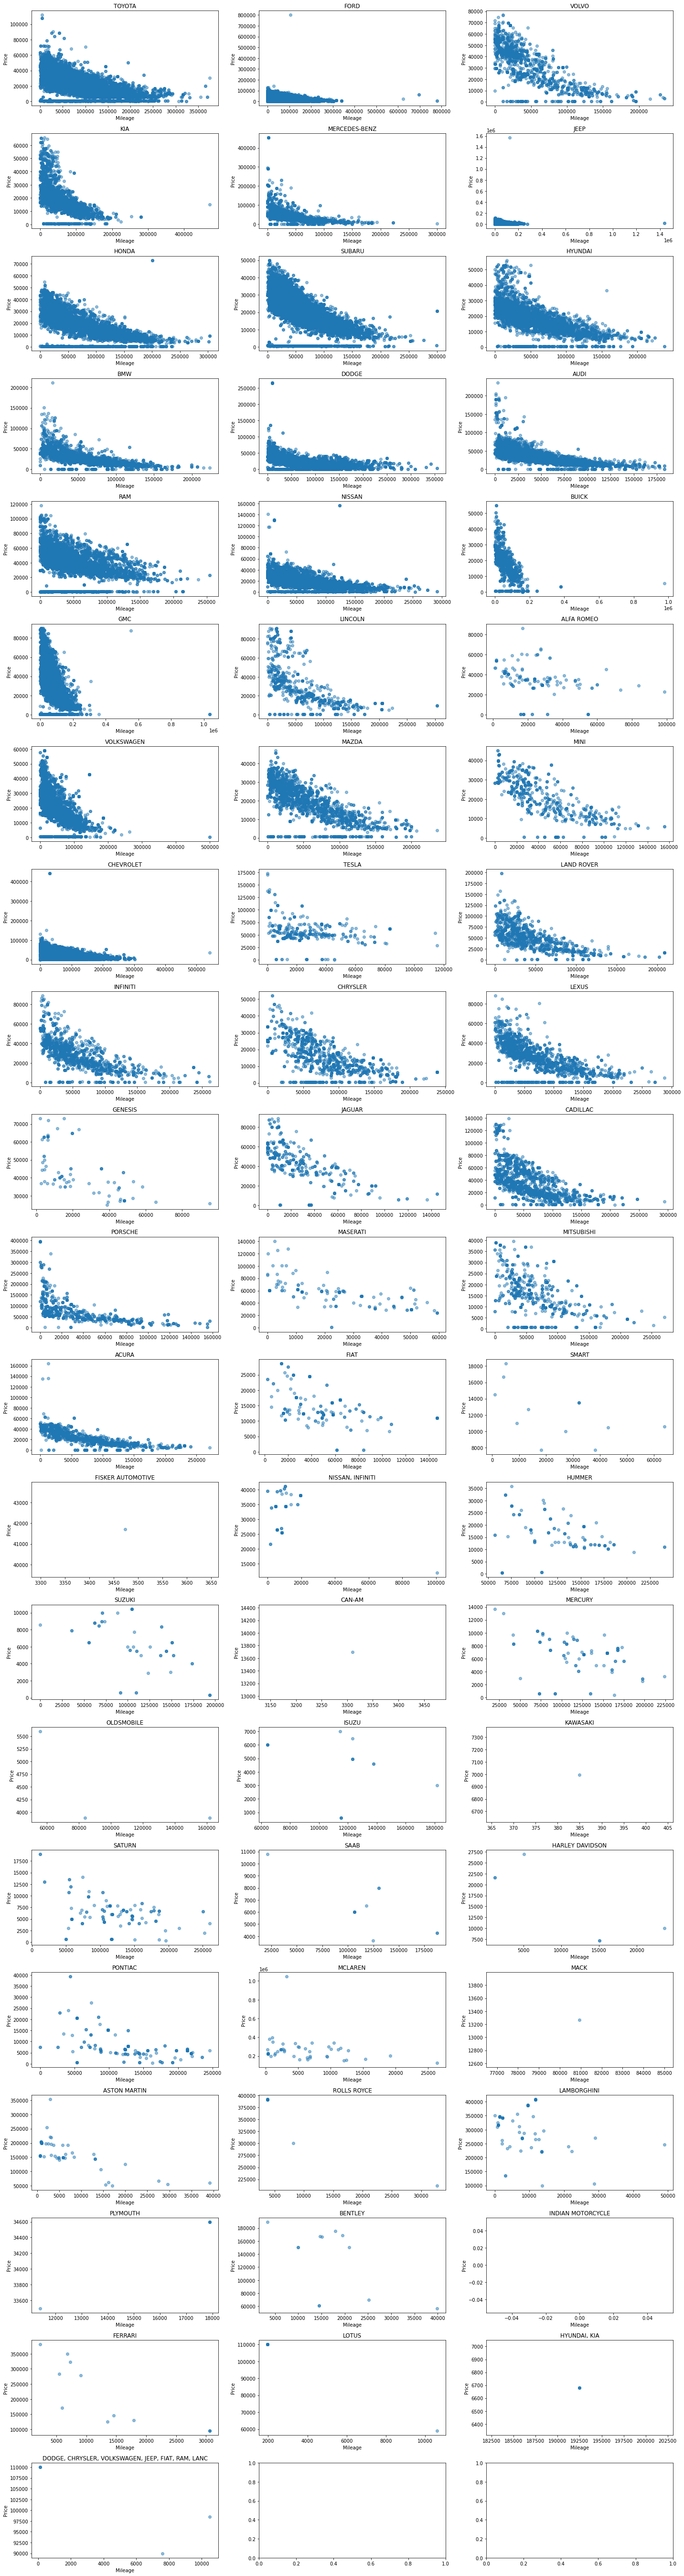

In [37]:
brands = colorado_cars_df['brandname'].unique()
fig, ax = plt.subplots(nrows=21, ncols=3, figsize=(20,75))


for i, brand in enumerate(brands):
    curr_brand_df = colorado_cars_df[(colorado_cars_df['brandname']==brand) & (colorado_cars_df['mileage'] != 0) & (colorado_cars_df['askprice'] != 0)].copy()
    ax[i//3,i%3].scatter(curr_brand_df['mileage'], curr_brand_df['askprice'],alpha=0.5)
    ax[i//3,i%3].set_title(brand)
    ax[i//3,i%3].set_xlabel('Mileage')
    ax[i//3,i%3].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [40]:
base_to_list_df = clean_df.loc[clean_df['baseprice'] != 0].copy()

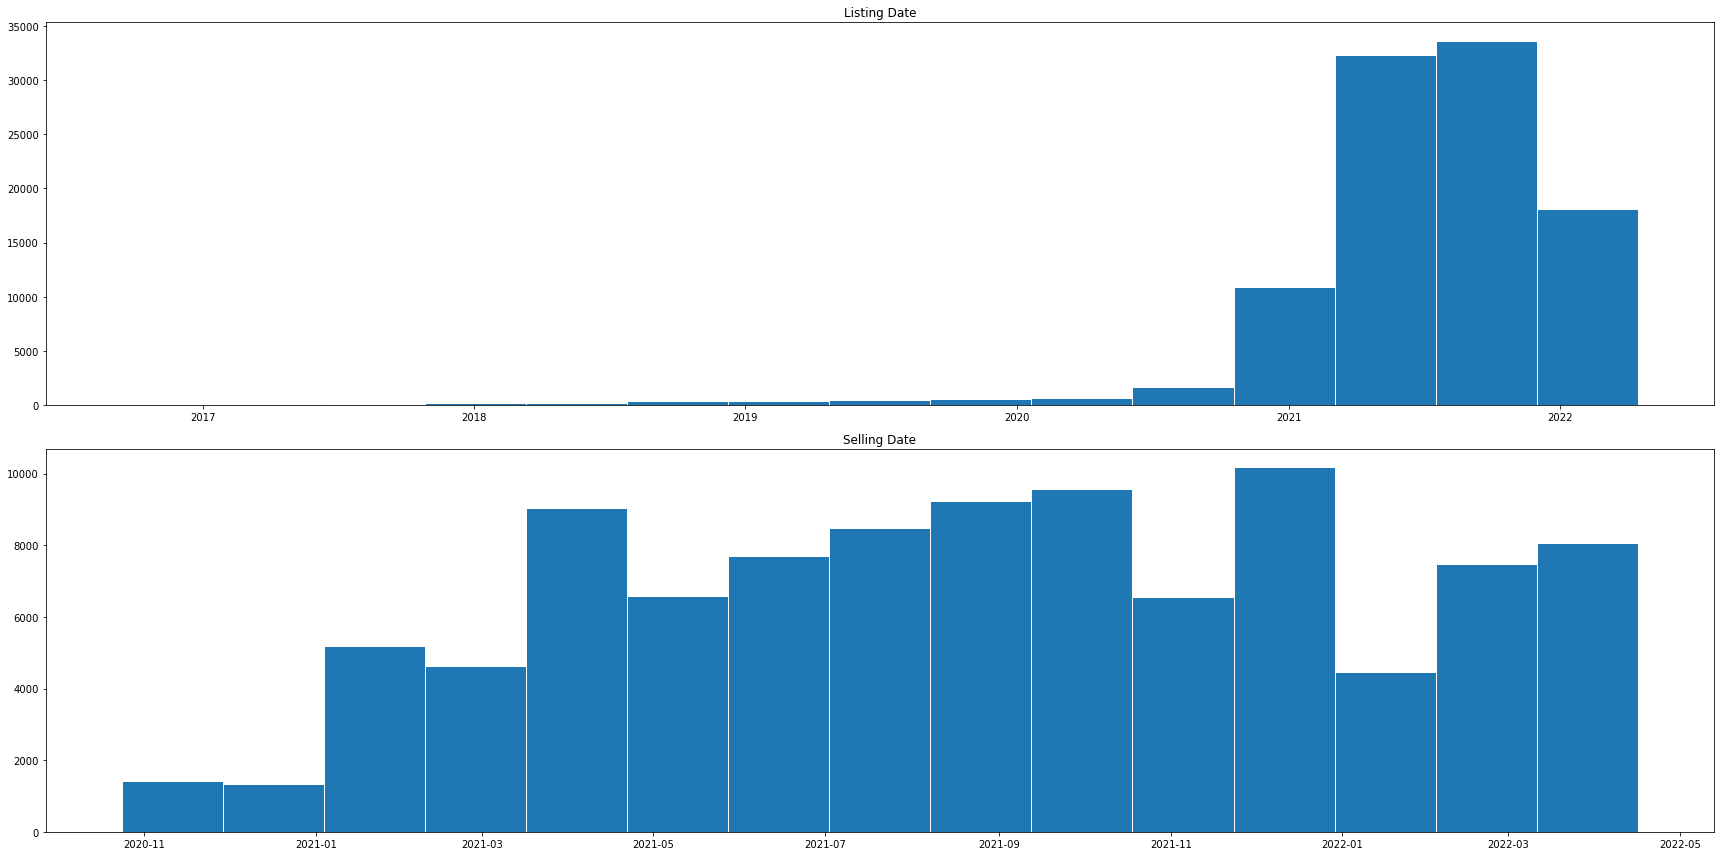

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(24,12))
ax[0].hist(sorted(clean_df['datelisted']),bins=15,ec='white')
ax[0].set_title("Listing Date")
ax[1].hist(sorted(clean_df['datesold']),bins=15,ec='white')
ax[1].set_title("Selling Date")
plt.tight_layout()

In [42]:
base_to_list_df['basetoaskdiff'] = base_to_list_df['baseprice'] - base_to_list_df['askprice']

In [43]:
cool = base_to_list_df.groupby(['zipcode']).mean()
cool

,askprice,year,mileage,enginecylinders,enginehp,baseprice,dealerid,basetoaskdiff
zipcode,,,,,,,,
80010,28814.725806,2018.241935,33602.217742,4.354839,213.000000,30872.217742,22907.104839,2057.491935
80011,30778.186528,2018.088083,0.000000,5.181347,248.752593,31645.854922,7904.000000,867.668394
80012,26798.784173,2018.060044,34373.975650,4.618152,215.419480,29485.945766,16140.461262,2687.161594
80014,30025.027273,2018.060140,30275.002098,5.027972,244.456643,32337.581119,25211.375524,2312.553846
80020,40080.020761,2018.179354,31017.315456,4.993656,280.462908,46258.662514,22932.918685,6178.641753
80027,65820.454545,2018.618182,21002.927273,5.872727,353.718182,68895.045455,17254.290909,3074.590909
80033,27547.182907,2018.143770,40048.202077,4.675719,223.189597,29874.688498,22023.830671,2327.505591
80104,32497.487805,2018.024390,37040.317073,5.170732,253.487805,31429.390244,18610.682927,-1068.097561
80110,30228.838645,2017.705179,49454.786853,5.239044,261.149402,33151.027888,29721.000000,2922.189243


In [44]:
zips = list(clean_df['zipcode'].unique())

coloradoLatLongsdict = {str(x): zipToLatLong[str(x)] for x in zips}
coloradoLatLongsdict

{'80920': ['38.957598', '-104.770770'],
 '80129': ['39.545535', '-105.010351'],
 '81101': ['37.481245', '-105.833213'],
 '80525': ['40.529861', '-105.036641'],
 '80123': ['39.616010', '-105.069449'],
 '80112': ['39.576926', '-104.857826'],
 '80121': ['39.610714', '-104.949039'],
 '80020': ['39.930782', '-105.074287'],
 '81601': ['39.601304', '-107.304388'],
 '80234': ['39.909992', '-105.002643'],
 '80124': ['39.532889', '-104.891089'],
 '80401': ['39.718726', '-105.236031'],
 '80221': ['39.817067', '-105.011035'],
 '80122': ['39.580309', '-104.954917'],
 '80246': ['39.705197', '-104.930842'],
 '80905': ['38.818910', '-104.838348'],
 '80923': ['38.926861', '-104.714813'],
 '80918': ['38.910393', '-104.780362'],
 '80301': ['40.049468', '-105.201421'],
 '81505': ['39.255826', '-108.534246'],
 '80014': ['39.663559', '-104.838066'],
 '81212': ['38.535754', '-105.398394'],
 '80012': ['39.699735', '-104.837643'],
 '81625': ['40.745223', '-107.694794'],
 '80538': ['40.457521', '-105.050761'],


In [45]:
latlongs = [coloradoLatLongsdict[x] for x in coloradoLatLongsdict.keys()]

In [46]:
t = np.asarray(latlongs).astype(float)
print(f"north: {max(t[:,0])}")
print(f"east:  {max(t[:,1])}")
print(f"south: {min(t[:,0])}")
print(f"west:  {min(t[:,1])}")

north: 40.87614
east:  -102.177979
south: 37.12149
west:  -108.547131


In [47]:
temp = base_to_list_df.groupby('zipcode').mean()
temp

,askprice,year,mileage,enginecylinders,enginehp,baseprice,dealerid,basetoaskdiff
zipcode,,,,,,,,
80010,28814.725806,2018.241935,33602.217742,4.354839,213.000000,30872.217742,22907.104839,2057.491935
80011,30778.186528,2018.088083,0.000000,5.181347,248.752593,31645.854922,7904.000000,867.668394
80012,26798.784173,2018.060044,34373.975650,4.618152,215.419480,29485.945766,16140.461262,2687.161594
80014,30025.027273,2018.060140,30275.002098,5.027972,244.456643,32337.581119,25211.375524,2312.553846
80020,40080.020761,2018.179354,31017.315456,4.993656,280.462908,46258.662514,22932.918685,6178.641753
80027,65820.454545,2018.618182,21002.927273,5.872727,353.718182,68895.045455,17254.290909,3074.590909
80033,27547.182907,2018.143770,40048.202077,4.675719,223.189597,29874.688498,22023.830671,2327.505591
80104,32497.487805,2018.024390,37040.317073,5.170732,253.487805,31429.390244,18610.682927,-1068.097561
80110,30228.838645,2017.705179,49454.786853,5.239044,261.149402,33151.027888,29721.000000,2922.189243


In [48]:
coloradoLatLongsdict['80221']

['39.817067', '-105.011035']

In [49]:
m = folium.Map(location = zipToLatLong['80221'], zoom_start=10)

for zc in temp.index:
    temp_vc = base_to_list_df.loc[base_to_list_df['zipcode'] == zc, 'brandname'].value_counts()
    top3brands = list(temp_vc.iloc[:3].index)
    color = "green" if temp.loc[zc,'basetoaskdiff'] > 0 else "red"
    folium.Marker(
        location = coloradoLatLongsdict[str(zc)],
        popup = f"Top Brands {top3brands}",
        icon=folium.Icon(color=color)
    ).add_to(m)




In [50]:
m

In [51]:
cool.loc[cool['basetoaskdiff']<0]

,askprice,year,mileage,enginecylinders,enginehp,baseprice,dealerid,basetoaskdiff
zipcode,,,,,,,,
80104,32497.487805,2018.024390,37040.317073,5.170732,253.487805,31429.390244,18610.682927,-1068.097561
80487,36042.476190,2018.000000,49370.428571,5.809524,283.904762,35146.428571,27781.000000,-896.047619
80621,34549.250000,2018.125000,40018.750000,5.500000,280.250000,33623.750000,11052.000000,-925.500000
80701,33248.320000,2018.320000,0.000000,5.120000,250.480000,31887.800000,26559.000000,-1360.520000
80751,38292.588235,2017.882353,33103.705882,5.411765,277.000000,37279.117647,17114.000000,-1013.470588
81050,42394.333333,2018.666667,22161.333333,5.333333,265.000000,37398.333333,20217.500000,-4996.000000
81301,34820.526316,2018.122807,47785.070175,5.122807,257.701754,33487.192982,24399.842105,-1333.333333
81401,35096.864286,2017.742857,45782.114286,5.342857,273.614286,33691.928571,17826.507143,-1404.935714
81625,35298.250000,2018.250000,6343.625000,4.750000,242.750000,32008.125000,24655.000000,-3290.125000


In [72]:
pre2021_cars = base_to_list_df.loc[base_to_list_df['datelisted'] < pd.to_datetime("2021")]
pre2021_cars

,askprice,brandname,modelname,year,mileage,datelisted,datesold,engineconfiguration,enginecylinders,enginehp,baseprice,zipcode,dealerid
1337,22992.0,HONDA,CIVIC,2018,35303.0,2020-12-05,2022-04-09,In-Line,4.0,158.0,21150.0,80920,8435
1339,30995.0,FORD,F-150,2017,102798.0,2020-10-31,2022-04-01,V-Shaped,6.0,365.0,33650.0,80920,8435
1340,27999.0,JEEP,GRAND CHEROKEE,2017,56676.0,2020-10-30,2022-03-24,V-Shaped,6.0,295.0,32695.0,80920,8435
1341,31697.0,JEEP,WRANGLER,2018,17701.0,2020-10-28,2022-03-10,V-Shaped,6.0,285.0,29240.0,80920,8435
1342,35998.0,LINCOLN,CONTINENTAL,2017,50002.0,2020-10-27,2022-04-06,V-Shaped,6.0,335.0,54075.0,80920,8435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176847,55973.0,MASERATI,GHIBLI,2018,13501.0,2020-05-13,2021-06-22,V-Shaped,6.0,424.0,73780.0,80129,34711
177173,33195.0,TOYOTA,TACOMA,2017,38994.0,2020-08-06,2020-12-22,V-Shaped,6.0,278.0,32195.0,80129,34711
177175,63975.0,MERCEDES-BENZ,E-CLASS,2019,8630.0,2020-07-17,2020-12-12,In-Line,6.0,429.0,72550.0,80129,34711
177177,48261.0,AUDI,S5,2018,19097.0,2020-06-17,2020-12-14,V-Shaped,6.0,354.0,62300.0,80129,34711


In [69]:
base_to_list_df['baseprice'] - base_to_list_df['askprice']

4166.954154170381

In [31]:
preshift_cars = base_to_list_df.loc[base_to_list_df['datelisted'] < pd.to_datetime("2021-03-01")]

In [32]:
X = preshift_cars[['brandname','modelname','year', 'mileage','engineconfiguration', 'enginecylinders', 'enginehp', 'baseprice']].copy()
X

,brandname,modelname,year,mileage,engineconfiguration,enginecylinders,enginehp,baseprice
1337,HONDA,CIVIC,2018,35303.0,In-Line,4.0,158.0,21150.0
1339,FORD,F-150,2017,102798.0,V-Shaped,6.0,365.0,33650.0
1340,JEEP,GRAND CHEROKEE,2017,56676.0,V-Shaped,6.0,295.0,32695.0
1341,JEEP,WRANGLER,2018,17701.0,V-Shaped,6.0,285.0,29240.0
1342,LINCOLN,CONTINENTAL,2017,50002.0,V-Shaped,6.0,335.0,54075.0
...,...,...,...,...,...,...,...,...
177166,TOYOTA,SIENNA,2018,29824.0,V-Shaped,6.0,296.0,37090.0
177173,TOYOTA,TACOMA,2017,38994.0,V-Shaped,6.0,278.0,32195.0
177175,MERCEDES-BENZ,E-CLASS,2019,8630.0,In-Line,6.0,429.0,72550.0
177177,AUDI,S5,2018,19097.0,V-Shaped,6.0,354.0,62300.0


In [33]:
# split = np.quantile():

target_range, bins = pd.qcut(preshift_cars['askprice'], 5, retbins=True)
bins


array([   299. ,  18570.2,  23392.2,  28865. ,  36394. , 215770. ])

In [34]:
target_range

1337       (18570.2, 23392.2]
1339       (28865.0, 36394.0]
1340       (23392.2, 28865.0]
1341       (28865.0, 36394.0]
1342       (28865.0, 36394.0]
                 ...         
177166     (28865.0, 36394.0]
177173     (28865.0, 36394.0]
177175    (36394.0, 215770.0]
177177    (36394.0, 215770.0]
177179    (36394.0, 215770.0]
Name: askprice, Length: 6119, dtype: category
Categories (5, interval[float64, right]): [(298.999, 18570.2] < (18570.2, 23392.2] < (23392.2, 28865.0] < (28865.0, 36394.0] < (36394.0, 215770.0]]

In [35]:
cats = ["(298.999, 18570.2]", "(18570.2, 23392.2]", "(23392.2, 28865.0]", "(28865.0, 36394.0]", "(36394.0, 215770.0]"]
labels = [cats.index(str(x)) for x in target_range]

In [36]:
preshift_cars.loc[:,'target'] = labels

/Users/will/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [37]:
y_reg = preshift_cars['askprice']
y_class = preshift_cars['target']

In [38]:
from catboost import CatBoostRegressor, CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score

In [39]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg)

In [40]:
cat_feats = np.where(X.dtypes != float)[0]

In [41]:
classification_model=CatBoostClassifier(iterations=1000, depth=5,learning_rate=0.5)
classification_model.fit(X_train_class, y_train_class, cat_features=cat_feats)

0:	learn: 1.2349559	total: 70.1ms	remaining: 1m 10s
1:	learn: 1.0964130	total: 80.8ms	remaining: 40.3s
2:	learn: 0.9625339	total: 90.3ms	remaining: 30s
3:	learn: 0.9003645	total: 97.1ms	remaining: 24.2s
4:	learn: 0.8588669	total: 107ms	remaining: 21.3s
5:	learn: 0.8204441	total: 115ms	remaining: 19s
6:	learn: 0.7865653	total: 124ms	remaining: 17.5s
7:	learn: 0.7716679	total: 132ms	remaining: 16.4s
8:	learn: 0.7610021	total: 142ms	remaining: 15.7s
9:	learn: 0.7322767	total: 152ms	remaining: 15s
10:	learn: 0.7217487	total: 162ms	remaining: 14.6s
11:	learn: 0.7091869	total: 171ms	remaining: 14.1s
12:	learn: 0.6920314	total: 182ms	remaining: 13.8s
13:	learn: 0.6888939	total: 190ms	remaining: 13.4s
14:	learn: 0.6823262	total: 199ms	remaining: 13.1s
15:	learn: 0.6788450	total: 210ms	remaining: 12.9s
16:	learn: 0.6684261	total: 220ms	remaining: 12.7s
17:	learn: 0.6606025	total: 229ms	remaining: 12.5s
18:	learn: 0.6556835	total: 239ms	remaining: 12.3s
19:	learn: 0.6447862	total: 249ms	remainin

165:	learn: 0.3449997	total: 1.68s	remaining: 8.43s
166:	learn: 0.3442483	total: 1.69s	remaining: 8.41s
167:	learn: 0.3418797	total: 1.7s	remaining: 8.4s
168:	learn: 0.3413144	total: 1.71s	remaining: 8.4s
169:	learn: 0.3406150	total: 1.72s	remaining: 8.37s
170:	learn: 0.3402847	total: 1.73s	remaining: 8.37s
171:	learn: 0.3395009	total: 1.73s	remaining: 8.35s
172:	learn: 0.3379578	total: 1.74s	remaining: 8.33s
173:	learn: 0.3361646	total: 1.75s	remaining: 8.32s
174:	learn: 0.3350695	total: 1.76s	remaining: 8.3s
175:	learn: 0.3347430	total: 1.77s	remaining: 8.28s
176:	learn: 0.3335471	total: 1.78s	remaining: 8.28s
177:	learn: 0.3332487	total: 1.79s	remaining: 8.27s
178:	learn: 0.3326991	total: 1.8s	remaining: 8.25s
179:	learn: 0.3314635	total: 1.81s	remaining: 8.24s
180:	learn: 0.3310373	total: 1.82s	remaining: 8.22s
181:	learn: 0.3295497	total: 1.83s	remaining: 8.21s
182:	learn: 0.3288759	total: 1.84s	remaining: 8.21s
183:	learn: 0.3280634	total: 1.84s	remaining: 8.18s
184:	learn: 0.327

327:	learn: 0.2290890	total: 3.08s	remaining: 6.31s
328:	learn: 0.2285489	total: 3.09s	remaining: 6.3s
329:	learn: 0.2283122	total: 3.1s	remaining: 6.29s
330:	learn: 0.2272076	total: 3.11s	remaining: 6.28s
331:	learn: 0.2267872	total: 3.12s	remaining: 6.27s
332:	learn: 0.2263451	total: 3.12s	remaining: 6.26s
333:	learn: 0.2254197	total: 3.13s	remaining: 6.25s
334:	learn: 0.2251465	total: 3.14s	remaining: 6.23s
335:	learn: 0.2246107	total: 3.15s	remaining: 6.22s
336:	learn: 0.2243336	total: 3.16s	remaining: 6.21s
337:	learn: 0.2236926	total: 3.16s	remaining: 6.2s
338:	learn: 0.2233419	total: 3.17s	remaining: 6.18s
339:	learn: 0.2224980	total: 3.18s	remaining: 6.17s
340:	learn: 0.2218693	total: 3.19s	remaining: 6.16s
341:	learn: 0.2214811	total: 3.2s	remaining: 6.15s
342:	learn: 0.2208040	total: 3.2s	remaining: 6.14s
343:	learn: 0.2202548	total: 3.21s	remaining: 6.12s
344:	learn: 0.2200233	total: 3.22s	remaining: 6.11s
345:	learn: 0.2194167	total: 3.23s	remaining: 6.1s
346:	learn: 0.2189

486:	learn: 0.1660362	total: 4.48s	remaining: 4.72s
487:	learn: 0.1659045	total: 4.49s	remaining: 4.71s
488:	learn: 0.1657186	total: 4.5s	remaining: 4.7s
489:	learn: 0.1655388	total: 4.51s	remaining: 4.69s
490:	learn: 0.1650040	total: 4.51s	remaining: 4.68s
491:	learn: 0.1646219	total: 4.52s	remaining: 4.67s
492:	learn: 0.1645613	total: 4.53s	remaining: 4.66s
493:	learn: 0.1641958	total: 4.54s	remaining: 4.65s
494:	learn: 0.1636705	total: 4.55s	remaining: 4.64s
495:	learn: 0.1633108	total: 4.56s	remaining: 4.63s
496:	learn: 0.1631737	total: 4.57s	remaining: 4.62s
497:	learn: 0.1629773	total: 4.58s	remaining: 4.61s
498:	learn: 0.1627431	total: 4.58s	remaining: 4.6s
499:	learn: 0.1624767	total: 4.59s	remaining: 4.59s
500:	learn: 0.1623440	total: 4.6s	remaining: 4.58s
501:	learn: 0.1619974	total: 4.61s	remaining: 4.57s
502:	learn: 0.1618369	total: 4.62s	remaining: 4.56s
503:	learn: 0.1616164	total: 4.62s	remaining: 4.55s
504:	learn: 0.1612226	total: 4.63s	remaining: 4.54s
505:	learn: 0.16

654:	learn: 0.1259406	total: 5.89s	remaining: 3.1s
655:	learn: 0.1257108	total: 5.9s	remaining: 3.09s
656:	learn: 0.1252752	total: 5.91s	remaining: 3.08s
657:	learn: 0.1251185	total: 5.92s	remaining: 3.08s
658:	learn: 0.1249021	total: 5.93s	remaining: 3.07s
659:	learn: 0.1246683	total: 5.94s	remaining: 3.06s
660:	learn: 0.1243785	total: 5.95s	remaining: 3.05s
661:	learn: 0.1242917	total: 5.95s	remaining: 3.04s
662:	learn: 0.1239352	total: 5.96s	remaining: 3.03s
663:	learn: 0.1235818	total: 5.97s	remaining: 3.02s
664:	learn: 0.1232551	total: 5.98s	remaining: 3.01s
665:	learn: 0.1229937	total: 5.99s	remaining: 3s
666:	learn: 0.1228102	total: 6s	remaining: 3s
667:	learn: 0.1224635	total: 6.01s	remaining: 2.98s
668:	learn: 0.1222685	total: 6.02s	remaining: 2.98s
669:	learn: 0.1220369	total: 6.02s	remaining: 2.97s
670:	learn: 0.1216285	total: 6.03s	remaining: 2.96s
671:	learn: 0.1213742	total: 6.04s	remaining: 2.95s
672:	learn: 0.1211909	total: 6.05s	remaining: 2.94s
673:	learn: 0.1210760	t

818:	learn: 0.1010402	total: 7.3s	remaining: 1.61s
819:	learn: 0.1008972	total: 7.31s	remaining: 1.6s
820:	learn: 0.1007105	total: 7.32s	remaining: 1.6s
821:	learn: 0.1006492	total: 7.33s	remaining: 1.59s
822:	learn: 0.1005024	total: 7.34s	remaining: 1.58s
823:	learn: 0.1003003	total: 7.35s	remaining: 1.57s
824:	learn: 0.1000855	total: 7.36s	remaining: 1.56s
825:	learn: 0.1000624	total: 7.36s	remaining: 1.55s
826:	learn: 0.0999528	total: 7.37s	remaining: 1.54s
827:	learn: 0.0998617	total: 7.38s	remaining: 1.53s
828:	learn: 0.0997252	total: 7.39s	remaining: 1.52s
829:	learn: 0.0996543	total: 7.4s	remaining: 1.51s
830:	learn: 0.0994024	total: 7.4s	remaining: 1.5s
831:	learn: 0.0992456	total: 7.41s	remaining: 1.5s
832:	learn: 0.0991255	total: 7.42s	remaining: 1.49s
833:	learn: 0.0988935	total: 7.43s	remaining: 1.48s
834:	learn: 0.0987750	total: 7.44s	remaining: 1.47s
835:	learn: 0.0987429	total: 7.45s	remaining: 1.46s
836:	learn: 0.0986427	total: 7.46s	remaining: 1.45s
837:	learn: 0.09859

980:	learn: 0.0832145	total: 8.69s	remaining: 168ms
981:	learn: 0.0831765	total: 8.7s	remaining: 160ms
982:	learn: 0.0830005	total: 8.71s	remaining: 151ms
983:	learn: 0.0829257	total: 8.72s	remaining: 142ms
984:	learn: 0.0827963	total: 8.73s	remaining: 133ms
985:	learn: 0.0827393	total: 8.74s	remaining: 124ms
986:	learn: 0.0826802	total: 8.75s	remaining: 115ms
987:	learn: 0.0826044	total: 8.75s	remaining: 106ms
988:	learn: 0.0825407	total: 8.76s	remaining: 97.5ms
989:	learn: 0.0824719	total: 8.77s	remaining: 88.6ms
990:	learn: 0.0824105	total: 8.78s	remaining: 79.7ms
991:	learn: 0.0823742	total: 8.79s	remaining: 70.9ms
992:	learn: 0.0823036	total: 8.8s	remaining: 62ms
993:	learn: 0.0822314	total: 8.81s	remaining: 53.2ms
994:	learn: 0.0821524	total: 8.81s	remaining: 44.3ms
995:	learn: 0.0820983	total: 8.82s	remaining: 35.4ms
996:	learn: 0.0820582	total: 8.83s	remaining: 26.6ms
997:	learn: 0.0819869	total: 8.84s	remaining: 17.7ms
998:	learn: 0.0819618	total: 8.85s	remaining: 8.86ms
999:	

In [42]:
regression_model=CatBoostRegressor(iterations=5000, depth=5,learning_rate=0.5)
regression_model.fit(X_train_reg, y_train_reg, cat_features=cat_feats)

0:	learn: 10017.7110491	total: 3.45ms	remaining: 17.2s
1:	learn: 7965.6449904	total: 7.21ms	remaining: 18s
2:	learn: 6946.1188590	total: 11.3ms	remaining: 18.8s
3:	learn: 6478.0507032	total: 13.7ms	remaining: 17.1s
4:	learn: 6139.0047979	total: 16.2ms	remaining: 16.2s
5:	learn: 5847.7769196	total: 19.3ms	remaining: 16.1s
6:	learn: 5617.4713108	total: 21.6ms	remaining: 15.4s
7:	learn: 5460.7971033	total: 23.6ms	remaining: 14.8s
8:	learn: 5390.7795291	total: 26.2ms	remaining: 14.5s
9:	learn: 5266.7875676	total: 28.3ms	remaining: 14.1s
10:	learn: 5197.1633238	total: 30ms	remaining: 13.6s
11:	learn: 5135.1952324	total: 32.4ms	remaining: 13.5s
12:	learn: 5100.2970864	total: 34ms	remaining: 13s
13:	learn: 5024.2044178	total: 35.9ms	remaining: 12.8s
14:	learn: 4953.6879622	total: 38.3ms	remaining: 12.7s
15:	learn: 4937.8908816	total: 40.6ms	remaining: 12.6s
16:	learn: 4879.1490901	total: 42.4ms	remaining: 12.4s
17:	learn: 4833.1806736	total: 44.3ms	remaining: 12.3s
18:	learn: 4810.1683304	tot

163:	learn: 2925.8251445	total: 349ms	remaining: 10.3s
164:	learn: 2923.6926648	total: 351ms	remaining: 10.3s
165:	learn: 2919.2829741	total: 353ms	remaining: 10.3s
166:	learn: 2916.8040894	total: 355ms	remaining: 10.3s
167:	learn: 2911.8059595	total: 357ms	remaining: 10.3s
168:	learn: 2910.9330418	total: 359ms	remaining: 10.3s
169:	learn: 2899.3870733	total: 364ms	remaining: 10.3s
170:	learn: 2896.6322276	total: 369ms	remaining: 10.4s
171:	learn: 2893.0263769	total: 372ms	remaining: 10.4s
172:	learn: 2891.8858046	total: 374ms	remaining: 10.4s
173:	learn: 2877.8549913	total: 377ms	remaining: 10.5s
174:	learn: 2873.2330654	total: 380ms	remaining: 10.5s
175:	learn: 2870.4341667	total: 384ms	remaining: 10.5s
176:	learn: 2869.5815774	total: 388ms	remaining: 10.6s
177:	learn: 2864.3667385	total: 392ms	remaining: 10.6s
178:	learn: 2859.8519941	total: 395ms	remaining: 10.6s
179:	learn: 2857.7537237	total: 398ms	remaining: 10.7s
180:	learn: 2842.5744294	total: 402ms	remaining: 10.7s
181:	learn

329:	learn: 2314.3347988	total: 719ms	remaining: 10.2s
330:	learn: 2313.2661952	total: 721ms	remaining: 10.2s
331:	learn: 2312.5851498	total: 725ms	remaining: 10.2s
332:	learn: 2310.5367950	total: 727ms	remaining: 10.2s
333:	learn: 2309.6075339	total: 730ms	remaining: 10.2s
334:	learn: 2308.4516863	total: 732ms	remaining: 10.2s
335:	learn: 2301.7713115	total: 734ms	remaining: 10.2s
336:	learn: 2301.2625473	total: 736ms	remaining: 10.2s
337:	learn: 2299.4915960	total: 738ms	remaining: 10.2s
338:	learn: 2298.9690392	total: 739ms	remaining: 10.2s
339:	learn: 2294.5800182	total: 742ms	remaining: 10.2s
340:	learn: 2292.8864912	total: 744ms	remaining: 10.2s
341:	learn: 2280.7565166	total: 746ms	remaining: 10.2s
342:	learn: 2280.0519056	total: 748ms	remaining: 10.2s
343:	learn: 2276.2124703	total: 750ms	remaining: 10.1s
344:	learn: 2272.7380629	total: 752ms	remaining: 10.2s
345:	learn: 2270.9929130	total: 755ms	remaining: 10.2s
346:	learn: 2269.8558925	total: 758ms	remaining: 10.2s
347:	learn

493:	learn: 1976.9190831	total: 1.08s	remaining: 9.86s
494:	learn: 1975.5389474	total: 1.08s	remaining: 9.86s
495:	learn: 1974.2497593	total: 1.09s	remaining: 9.86s
496:	learn: 1971.8397216	total: 1.09s	remaining: 9.86s
497:	learn: 1968.4628336	total: 1.09s	remaining: 9.86s
498:	learn: 1967.8810019	total: 1.09s	remaining: 9.85s
499:	learn: 1967.2061712	total: 1.09s	remaining: 9.85s
500:	learn: 1966.0370859	total: 1.1s	remaining: 9.85s
501:	learn: 1960.5628283	total: 1.1s	remaining: 9.85s
502:	learn: 1956.2963197	total: 1.1s	remaining: 9.84s
503:	learn: 1955.1011280	total: 1.1s	remaining: 9.83s
504:	learn: 1953.9091831	total: 1.1s	remaining: 9.83s
505:	learn: 1953.1119848	total: 1.1s	remaining: 9.82s
506:	learn: 1952.1749603	total: 1.11s	remaining: 9.82s
507:	learn: 1948.0058413	total: 1.11s	remaining: 9.82s
508:	learn: 1947.5376298	total: 1.11s	remaining: 9.82s
509:	learn: 1944.0096446	total: 1.11s	remaining: 9.81s
510:	learn: 1942.3936321	total: 1.12s	remaining: 9.81s
511:	learn: 1939

664:	learn: 1734.6929205	total: 1.45s	remaining: 9.46s
665:	learn: 1733.8704491	total: 1.45s	remaining: 9.45s
666:	learn: 1732.5895545	total: 1.45s	remaining: 9.45s
667:	learn: 1731.6385973	total: 1.46s	remaining: 9.45s
668:	learn: 1730.8686436	total: 1.46s	remaining: 9.44s
669:	learn: 1729.6483665	total: 1.46s	remaining: 9.44s
670:	learn: 1728.3058394	total: 1.47s	remaining: 9.46s
671:	learn: 1727.4206987	total: 1.47s	remaining: 9.46s
672:	learn: 1726.5118983	total: 1.47s	remaining: 9.45s
673:	learn: 1724.0904442	total: 1.47s	remaining: 9.45s
674:	learn: 1722.7672899	total: 1.47s	remaining: 9.45s
675:	learn: 1722.3340649	total: 1.48s	remaining: 9.45s
676:	learn: 1721.5859282	total: 1.48s	remaining: 9.45s
677:	learn: 1719.3352700	total: 1.48s	remaining: 9.45s
678:	learn: 1714.8096317	total: 1.48s	remaining: 9.44s
679:	learn: 1713.6417037	total: 1.49s	remaining: 9.44s
680:	learn: 1711.5629651	total: 1.49s	remaining: 9.44s
681:	learn: 1709.9941757	total: 1.49s	remaining: 9.43s
682:	learn

848:	learn: 1550.9487308	total: 1.82s	remaining: 8.91s
849:	learn: 1549.5073640	total: 1.82s	remaining: 8.91s
850:	learn: 1548.8475195	total: 1.83s	remaining: 8.9s
851:	learn: 1547.7528178	total: 1.83s	remaining: 8.9s
852:	learn: 1546.7814072	total: 1.83s	remaining: 8.9s
853:	learn: 1545.8787683	total: 1.83s	remaining: 8.9s
854:	learn: 1545.6564005	total: 1.83s	remaining: 8.9s
855:	learn: 1545.0327867	total: 1.84s	remaining: 8.89s
856:	learn: 1544.4137712	total: 1.84s	remaining: 8.89s
857:	learn: 1543.3808849	total: 1.84s	remaining: 8.89s
858:	learn: 1543.3016420	total: 1.84s	remaining: 8.88s
859:	learn: 1542.9269433	total: 1.84s	remaining: 8.88s
860:	learn: 1542.5128878	total: 1.85s	remaining: 8.88s
861:	learn: 1542.0346008	total: 1.85s	remaining: 8.88s
862:	learn: 1540.7641605	total: 1.85s	remaining: 8.88s
863:	learn: 1540.7381140	total: 1.85s	remaining: 8.87s
864:	learn: 1537.2131934	total: 1.85s	remaining: 8.87s
865:	learn: 1536.8548700	total: 1.86s	remaining: 8.87s
866:	learn: 153

1036:	learn: 1423.1091063	total: 2.19s	remaining: 8.38s
1037:	learn: 1422.8810073	total: 2.19s	remaining: 8.38s
1038:	learn: 1421.8281913	total: 2.2s	remaining: 8.38s
1039:	learn: 1421.5134732	total: 2.2s	remaining: 8.38s
1040:	learn: 1420.6106019	total: 2.2s	remaining: 8.37s
1041:	learn: 1420.2239142	total: 2.2s	remaining: 8.37s
1042:	learn: 1420.0154752	total: 2.21s	remaining: 8.37s
1043:	learn: 1419.5122782	total: 2.21s	remaining: 8.36s
1044:	learn: 1419.4179278	total: 2.21s	remaining: 8.36s
1045:	learn: 1418.9509624	total: 2.21s	remaining: 8.36s
1046:	learn: 1418.9189364	total: 2.21s	remaining: 8.35s
1047:	learn: 1418.5179203	total: 2.21s	remaining: 8.35s
1048:	learn: 1418.1243842	total: 2.22s	remaining: 8.35s
1049:	learn: 1417.1389084	total: 2.22s	remaining: 8.35s
1050:	learn: 1416.1457829	total: 2.22s	remaining: 8.34s
1051:	learn: 1415.4313345	total: 2.22s	remaining: 8.34s
1052:	learn: 1415.2469671	total: 2.22s	remaining: 8.34s
1053:	learn: 1414.7191823	total: 2.23s	remaining: 8.

1231:	learn: 1306.7559928	total: 2.57s	remaining: 7.85s
1232:	learn: 1305.7350335	total: 2.57s	remaining: 7.85s
1233:	learn: 1305.1173837	total: 2.57s	remaining: 7.85s
1234:	learn: 1304.8500954	total: 2.58s	remaining: 7.86s
1235:	learn: 1304.5372681	total: 2.58s	remaining: 7.86s
1236:	learn: 1303.9508276	total: 2.58s	remaining: 7.86s
1237:	learn: 1303.4989348	total: 2.59s	remaining: 7.86s
1238:	learn: 1302.9578827	total: 2.59s	remaining: 7.87s
1239:	learn: 1302.3408378	total: 2.6s	remaining: 7.87s
1240:	learn: 1301.9339090	total: 2.6s	remaining: 7.88s
1241:	learn: 1301.4022031	total: 2.6s	remaining: 7.88s
1242:	learn: 1301.0583189	total: 2.61s	remaining: 7.88s
1243:	learn: 1300.6477404	total: 2.61s	remaining: 7.88s
1244:	learn: 1299.6411563	total: 2.61s	remaining: 7.87s
1245:	learn: 1298.8670698	total: 2.61s	remaining: 7.87s
1246:	learn: 1298.2387517	total: 2.62s	remaining: 7.87s
1247:	learn: 1297.6424135	total: 2.62s	remaining: 7.88s
1248:	learn: 1297.5007955	total: 2.62s	remaining: 7

1404:	learn: 1218.3682125	total: 2.94s	remaining: 7.52s
1405:	learn: 1218.2493228	total: 2.94s	remaining: 7.52s
1406:	learn: 1216.8682073	total: 2.94s	remaining: 7.51s
1407:	learn: 1216.0351806	total: 2.94s	remaining: 7.51s
1408:	learn: 1215.8602121	total: 2.95s	remaining: 7.51s
1409:	learn: 1215.4918308	total: 2.95s	remaining: 7.51s
1410:	learn: 1214.6218874	total: 2.95s	remaining: 7.51s
1411:	learn: 1214.3971622	total: 2.95s	remaining: 7.51s
1412:	learn: 1213.8964399	total: 2.96s	remaining: 7.5s
1413:	learn: 1213.4445828	total: 2.96s	remaining: 7.5s
1414:	learn: 1213.2102695	total: 2.96s	remaining: 7.5s
1415:	learn: 1213.1731831	total: 2.96s	remaining: 7.5s
1416:	learn: 1213.0457629	total: 2.96s	remaining: 7.49s
1417:	learn: 1212.8592208	total: 2.97s	remaining: 7.49s
1418:	learn: 1212.2725652	total: 2.97s	remaining: 7.49s
1419:	learn: 1211.8252432	total: 2.97s	remaining: 7.49s
1420:	learn: 1211.2615793	total: 2.97s	remaining: 7.49s
1421:	learn: 1211.0403583	total: 2.97s	remaining: 7.

1563:	learn: 1152.3326574	total: 3.31s	remaining: 7.27s
1564:	learn: 1152.1640468	total: 3.31s	remaining: 7.27s
1565:	learn: 1152.0116632	total: 3.31s	remaining: 7.27s
1566:	learn: 1151.9647770	total: 3.32s	remaining: 7.27s
1567:	learn: 1151.7332594	total: 3.32s	remaining: 7.26s
1568:	learn: 1151.6283481	total: 3.32s	remaining: 7.26s
1569:	learn: 1150.9907503	total: 3.32s	remaining: 7.26s
1570:	learn: 1150.2967104	total: 3.33s	remaining: 7.26s
1571:	learn: 1149.7394039	total: 3.33s	remaining: 7.26s
1572:	learn: 1149.6613177	total: 3.33s	remaining: 7.26s
1573:	learn: 1149.6198982	total: 3.33s	remaining: 7.25s
1574:	learn: 1149.1328911	total: 3.33s	remaining: 7.25s
1575:	learn: 1148.9760659	total: 3.34s	remaining: 7.25s
1576:	learn: 1148.1841303	total: 3.34s	remaining: 7.25s
1577:	learn: 1147.5923672	total: 3.34s	remaining: 7.25s
1578:	learn: 1147.5138853	total: 3.34s	remaining: 7.24s
1579:	learn: 1147.0873823	total: 3.35s	remaining: 7.24s
1580:	learn: 1146.8168844	total: 3.35s	remaining

1736:	learn: 1101.4126659	total: 3.68s	remaining: 6.91s
1737:	learn: 1101.0814741	total: 3.68s	remaining: 6.91s
1738:	learn: 1100.2986311	total: 3.69s	remaining: 6.91s
1739:	learn: 1099.5069205	total: 3.69s	remaining: 6.91s
1740:	learn: 1099.4403506	total: 3.69s	remaining: 6.91s
1741:	learn: 1099.1511679	total: 3.69s	remaining: 6.91s
1742:	learn: 1098.2800107	total: 3.7s	remaining: 6.91s
1743:	learn: 1098.1517931	total: 3.7s	remaining: 6.91s
1744:	learn: 1097.5483064	total: 3.7s	remaining: 6.91s
1745:	learn: 1096.9905912	total: 3.71s	remaining: 6.91s
1746:	learn: 1096.6140281	total: 3.71s	remaining: 6.91s
1747:	learn: 1096.4293755	total: 3.71s	remaining: 6.91s
1748:	learn: 1096.0100232	total: 3.71s	remaining: 6.91s
1749:	learn: 1095.8278723	total: 3.72s	remaining: 6.91s
1750:	learn: 1095.5169278	total: 3.72s	remaining: 6.91s
1751:	learn: 1095.5009227	total: 3.73s	remaining: 6.91s
1752:	learn: 1095.4377447	total: 3.73s	remaining: 6.91s
1753:	learn: 1095.2086062	total: 3.73s	remaining: 6

1903:	learn: 1046.2602216	total: 4.25s	remaining: 6.91s
1904:	learn: 1045.4723241	total: 4.25s	remaining: 6.91s
1905:	learn: 1044.9565436	total: 4.25s	remaining: 6.91s
1906:	learn: 1044.0351321	total: 4.26s	remaining: 6.9s
1907:	learn: 1043.9349874	total: 4.26s	remaining: 6.9s
1908:	learn: 1043.6750449	total: 4.26s	remaining: 6.9s
1909:	learn: 1043.4454178	total: 4.27s	remaining: 6.9s
1910:	learn: 1043.2629582	total: 4.27s	remaining: 6.9s
1911:	learn: 1043.0009632	total: 4.27s	remaining: 6.9s
1912:	learn: 1042.9147192	total: 4.28s	remaining: 6.9s
1913:	learn: 1042.1598291	total: 4.28s	remaining: 6.9s
1914:	learn: 1041.7649424	total: 4.28s	remaining: 6.9s
1915:	learn: 1041.5448756	total: 4.29s	remaining: 6.9s
1916:	learn: 1041.4245751	total: 4.29s	remaining: 6.9s
1917:	learn: 1040.9968740	total: 4.29s	remaining: 6.9s
1918:	learn: 1040.9032969	total: 4.3s	remaining: 6.9s
1919:	learn: 1040.7076493	total: 4.3s	remaining: 6.9s
1920:	learn: 1040.6388273	total: 4.3s	remaining: 6.9s
1921:	lear

2085:	learn: 1000.8015343	total: 4.8s	remaining: 6.71s
2086:	learn: 1000.5546482	total: 4.81s	remaining: 6.71s
2087:	learn: 1000.2986135	total: 4.81s	remaining: 6.71s
2088:	learn: 1000.1147712	total: 4.81s	remaining: 6.71s
2089:	learn: 1000.0763251	total: 4.82s	remaining: 6.71s
2090:	learn: 999.9275148	total: 4.82s	remaining: 6.71s
2091:	learn: 999.8286137	total: 4.82s	remaining: 6.7s
2092:	learn: 999.5103168	total: 4.82s	remaining: 6.7s
2093:	learn: 999.3460050	total: 4.83s	remaining: 6.7s
2094:	learn: 999.0485031	total: 4.83s	remaining: 6.7s
2095:	learn: 998.7185775	total: 4.83s	remaining: 6.7s
2096:	learn: 998.6397002	total: 4.84s	remaining: 6.7s
2097:	learn: 998.1808942	total: 4.84s	remaining: 6.69s
2098:	learn: 997.3187327	total: 4.84s	remaining: 6.69s
2099:	learn: 997.0649510	total: 4.84s	remaining: 6.69s
2100:	learn: 996.7989357	total: 4.85s	remaining: 6.69s
2101:	learn: 996.7097514	total: 4.85s	remaining: 6.69s
2102:	learn: 996.5320304	total: 4.85s	remaining: 6.68s
2103:	learn:

2290:	learn: 947.9750224	total: 5.37s	remaining: 6.35s
2291:	learn: 947.9468822	total: 5.37s	remaining: 6.35s
2292:	learn: 947.7167219	total: 5.37s	remaining: 6.34s
2293:	learn: 947.4471274	total: 5.38s	remaining: 6.34s
2294:	learn: 947.1022946	total: 5.38s	remaining: 6.34s
2295:	learn: 947.0355936	total: 5.38s	remaining: 6.34s
2296:	learn: 946.7316197	total: 5.38s	remaining: 6.34s
2297:	learn: 946.6246419	total: 5.39s	remaining: 6.33s
2298:	learn: 946.5681279	total: 5.39s	remaining: 6.33s
2299:	learn: 946.1216976	total: 5.39s	remaining: 6.33s
2300:	learn: 946.0360934	total: 5.4s	remaining: 6.33s
2301:	learn: 945.9005160	total: 5.4s	remaining: 6.33s
2302:	learn: 945.6124179	total: 5.4s	remaining: 6.33s
2303:	learn: 945.4260784	total: 5.4s	remaining: 6.32s
2304:	learn: 945.0143587	total: 5.41s	remaining: 6.32s
2305:	learn: 944.8132509	total: 5.41s	remaining: 6.32s
2306:	learn: 944.5995770	total: 5.41s	remaining: 6.32s
2307:	learn: 944.5335970	total: 5.41s	remaining: 6.31s
2308:	learn: 9

2443:	learn: 917.0036154	total: 5.74s	remaining: 6s
2444:	learn: 916.7752035	total: 5.74s	remaining: 6s
2445:	learn: 916.7417861	total: 5.75s	remaining: 6s
2446:	learn: 916.6683591	total: 5.75s	remaining: 6s
2447:	learn: 915.1222729	total: 5.75s	remaining: 6s
2448:	learn: 914.7593891	total: 5.75s	remaining: 5.99s
2449:	learn: 914.6868926	total: 5.76s	remaining: 5.99s
2450:	learn: 914.3450312	total: 5.76s	remaining: 5.99s
2451:	learn: 913.7194141	total: 5.76s	remaining: 5.99s
2452:	learn: 913.6580309	total: 5.77s	remaining: 5.99s
2453:	learn: 913.2606018	total: 5.77s	remaining: 5.99s
2454:	learn: 912.7985853	total: 5.77s	remaining: 5.98s
2455:	learn: 912.6996008	total: 5.77s	remaining: 5.98s
2456:	learn: 912.5949032	total: 5.77s	remaining: 5.98s
2457:	learn: 912.2322085	total: 5.78s	remaining: 5.97s
2458:	learn: 911.9603096	total: 5.78s	remaining: 5.97s
2459:	learn: 911.7790853	total: 5.78s	remaining: 5.97s
2460:	learn: 911.4605146	total: 5.78s	remaining: 5.97s
2461:	learn: 911.3682130	

2653:	learn: 872.5775157	total: 6.3s	remaining: 5.57s
2654:	learn: 872.4550903	total: 6.3s	remaining: 5.56s
2655:	learn: 872.4094553	total: 6.3s	remaining: 5.56s
2656:	learn: 872.2570701	total: 6.3s	remaining: 5.56s
2657:	learn: 872.1280420	total: 6.31s	remaining: 5.56s
2658:	learn: 872.1086569	total: 6.31s	remaining: 5.55s
2659:	learn: 872.0558593	total: 6.31s	remaining: 5.55s
2660:	learn: 871.9719426	total: 6.31s	remaining: 5.55s
2661:	learn: 871.8400839	total: 6.31s	remaining: 5.54s
2662:	learn: 871.7794976	total: 6.32s	remaining: 5.54s
2663:	learn: 871.4570134	total: 6.32s	remaining: 5.54s
2664:	learn: 871.3562139	total: 6.32s	remaining: 5.54s
2665:	learn: 871.1331048	total: 6.32s	remaining: 5.53s
2666:	learn: 870.4106019	total: 6.32s	remaining: 5.53s
2667:	learn: 870.3443825	total: 6.33s	remaining: 5.53s
2668:	learn: 870.1065966	total: 6.33s	remaining: 5.53s
2669:	learn: 870.0990288	total: 6.33s	remaining: 5.53s
2670:	learn: 869.9731625	total: 6.33s	remaining: 5.52s
2671:	learn: 8

2821:	learn: 843.4113196	total: 6.67s	remaining: 5.15s
2822:	learn: 843.3696669	total: 6.67s	remaining: 5.14s
2823:	learn: 843.1556078	total: 6.67s	remaining: 5.14s
2824:	learn: 842.8315806	total: 6.67s	remaining: 5.14s
2825:	learn: 842.3964084	total: 6.68s	remaining: 5.13s
2826:	learn: 841.8596350	total: 6.68s	remaining: 5.13s
2827:	learn: 841.8296945	total: 6.68s	remaining: 5.13s
2828:	learn: 839.0782775	total: 6.68s	remaining: 5.13s
2829:	learn: 838.9625962	total: 6.69s	remaining: 5.13s
2830:	learn: 838.9331632	total: 6.69s	remaining: 5.12s
2831:	learn: 838.8789712	total: 6.69s	remaining: 5.12s
2832:	learn: 838.4227873	total: 6.69s	remaining: 5.12s
2833:	learn: 837.5720935	total: 6.7s	remaining: 5.12s
2834:	learn: 837.4234378	total: 6.7s	remaining: 5.12s
2835:	learn: 837.0580170	total: 6.7s	remaining: 5.11s
2836:	learn: 836.8035434	total: 6.7s	remaining: 5.11s
2837:	learn: 836.4971763	total: 6.7s	remaining: 5.11s
2838:	learn: 836.4563131	total: 6.71s	remaining: 5.1s
2839:	learn: 836

2999:	learn: 810.4083866	total: 7.04s	remaining: 4.69s
3000:	learn: 810.3238332	total: 7.04s	remaining: 4.69s
3001:	learn: 810.2510962	total: 7.04s	remaining: 4.69s
3002:	learn: 810.0353163	total: 7.05s	remaining: 4.69s
3003:	learn: 809.4535534	total: 7.05s	remaining: 4.68s
3004:	learn: 809.3441532	total: 7.05s	remaining: 4.68s
3005:	learn: 809.2498185	total: 7.06s	remaining: 4.68s
3006:	learn: 809.1165144	total: 7.06s	remaining: 4.68s
3007:	learn: 809.0158822	total: 7.06s	remaining: 4.68s
3008:	learn: 808.7161974	total: 7.06s	remaining: 4.67s
3009:	learn: 808.5962991	total: 7.07s	remaining: 4.67s
3010:	learn: 807.5511157	total: 7.07s	remaining: 4.67s
3011:	learn: 807.5095132	total: 7.07s	remaining: 4.67s
3012:	learn: 807.4058918	total: 7.07s	remaining: 4.66s
3013:	learn: 806.6563768	total: 7.07s	remaining: 4.66s
3014:	learn: 806.5936610	total: 7.08s	remaining: 4.66s
3015:	learn: 806.4283970	total: 7.08s	remaining: 4.66s
3016:	learn: 806.3986634	total: 7.08s	remaining: 4.66s
3017:	lear

3172:	learn: 785.3866680	total: 7.41s	remaining: 4.27s
3173:	learn: 785.3440538	total: 7.42s	remaining: 4.27s
3174:	learn: 785.3008215	total: 7.42s	remaining: 4.26s
3175:	learn: 785.0118209	total: 7.42s	remaining: 4.26s
3176:	learn: 784.9486041	total: 7.42s	remaining: 4.26s
3177:	learn: 784.8259319	total: 7.42s	remaining: 4.26s
3178:	learn: 784.7514595	total: 7.43s	remaining: 4.25s
3179:	learn: 784.7256583	total: 7.43s	remaining: 4.25s
3180:	learn: 784.5706309	total: 7.43s	remaining: 4.25s
3181:	learn: 784.5012498	total: 7.43s	remaining: 4.25s
3182:	learn: 783.5987095	total: 7.44s	remaining: 4.25s
3183:	learn: 783.4885032	total: 7.44s	remaining: 4.24s
3184:	learn: 783.4873924	total: 7.44s	remaining: 4.24s
3185:	learn: 783.4731506	total: 7.44s	remaining: 4.24s
3186:	learn: 783.4092104	total: 7.44s	remaining: 4.24s
3187:	learn: 783.3453712	total: 7.45s	remaining: 4.23s
3188:	learn: 783.0885543	total: 7.45s	remaining: 4.23s
3189:	learn: 782.8765280	total: 7.45s	remaining: 4.23s
3190:	lear

3336:	learn: 759.5386530	total: 7.79s	remaining: 3.88s
3337:	learn: 759.5003620	total: 7.79s	remaining: 3.88s
3338:	learn: 759.3147778	total: 7.79s	remaining: 3.87s
3339:	learn: 759.2750893	total: 7.79s	remaining: 3.87s
3340:	learn: 759.0153070	total: 7.79s	remaining: 3.87s
3341:	learn: 758.9446506	total: 7.79s	remaining: 3.87s
3342:	learn: 758.7903252	total: 7.8s	remaining: 3.86s
3343:	learn: 758.7496153	total: 7.8s	remaining: 3.86s
3344:	learn: 758.6869961	total: 7.8s	remaining: 3.86s
3345:	learn: 758.6764405	total: 7.8s	remaining: 3.86s
3346:	learn: 758.4449612	total: 7.81s	remaining: 3.85s
3347:	learn: 758.4230900	total: 7.81s	remaining: 3.85s
3348:	learn: 758.2798968	total: 7.81s	remaining: 3.85s
3349:	learn: 758.2432749	total: 7.81s	remaining: 3.85s
3350:	learn: 758.2371723	total: 7.82s	remaining: 3.85s
3351:	learn: 758.0680656	total: 7.82s	remaining: 3.84s
3352:	learn: 757.9252066	total: 7.82s	remaining: 3.84s
3353:	learn: 757.8076177	total: 7.82s	remaining: 3.84s
3354:	learn: 7

3506:	learn: 734.4419528	total: 8.15s	remaining: 3.47s
3507:	learn: 734.4299962	total: 8.16s	remaining: 3.47s
3508:	learn: 734.4265289	total: 8.16s	remaining: 3.47s
3509:	learn: 734.3093545	total: 8.16s	remaining: 3.46s
3510:	learn: 734.2106661	total: 8.17s	remaining: 3.46s
3511:	learn: 733.9852689	total: 8.17s	remaining: 3.46s
3512:	learn: 733.8770150	total: 8.17s	remaining: 3.46s
3513:	learn: 733.8644943	total: 8.17s	remaining: 3.46s
3514:	learn: 733.7194789	total: 8.18s	remaining: 3.45s
3515:	learn: 733.6383228	total: 8.18s	remaining: 3.45s
3516:	learn: 733.4642373	total: 8.18s	remaining: 3.45s
3517:	learn: 733.4432752	total: 8.18s	remaining: 3.45s
3518:	learn: 733.1172759	total: 8.18s	remaining: 3.44s
3519:	learn: 732.9856944	total: 8.19s	remaining: 3.44s
3520:	learn: 732.9296053	total: 8.19s	remaining: 3.44s
3521:	learn: 732.8970001	total: 8.19s	remaining: 3.44s
3522:	learn: 732.8775594	total: 8.19s	remaining: 3.43s
3523:	learn: 732.6361401	total: 8.19s	remaining: 3.43s
3524:	lear

3677:	learn: 709.0718872	total: 8.53s	remaining: 3.06s
3678:	learn: 709.0471618	total: 8.53s	remaining: 3.06s
3679:	learn: 708.9674220	total: 8.53s	remaining: 3.06s
3680:	learn: 708.8487760	total: 8.53s	remaining: 3.06s
3681:	learn: 708.4702682	total: 8.54s	remaining: 3.06s
3682:	learn: 708.2134636	total: 8.54s	remaining: 3.05s
3683:	learn: 708.0094100	total: 8.54s	remaining: 3.05s
3684:	learn: 707.9984359	total: 8.54s	remaining: 3.05s
3685:	learn: 707.9796751	total: 8.54s	remaining: 3.04s
3686:	learn: 707.9381399	total: 8.55s	remaining: 3.04s
3687:	learn: 707.8170499	total: 8.55s	remaining: 3.04s
3688:	learn: 707.8118190	total: 8.55s	remaining: 3.04s
3689:	learn: 707.5539192	total: 8.55s	remaining: 3.04s
3690:	learn: 707.5256541	total: 8.56s	remaining: 3.03s
3691:	learn: 707.4391167	total: 8.56s	remaining: 3.03s
3692:	learn: 707.3235874	total: 8.56s	remaining: 3.03s
3693:	learn: 707.3153321	total: 8.56s	remaining: 3.03s
3694:	learn: 707.2612331	total: 8.56s	remaining: 3.02s
3695:	lear

3846:	learn: 687.9968478	total: 8.9s	remaining: 2.67s
3847:	learn: 687.8870564	total: 8.9s	remaining: 2.67s
3848:	learn: 687.8827842	total: 8.9s	remaining: 2.66s
3849:	learn: 687.7530456	total: 8.91s	remaining: 2.66s
3850:	learn: 687.4624972	total: 8.91s	remaining: 2.66s
3851:	learn: 687.2796903	total: 8.91s	remaining: 2.66s
3852:	learn: 687.1727286	total: 8.91s	remaining: 2.65s
3853:	learn: 687.1265782	total: 8.92s	remaining: 2.65s
3854:	learn: 687.1217093	total: 8.92s	remaining: 2.65s
3855:	learn: 687.0314621	total: 8.92s	remaining: 2.65s
3856:	learn: 687.0088255	total: 8.93s	remaining: 2.64s
3857:	learn: 686.8668444	total: 8.93s	remaining: 2.64s
3858:	learn: 686.6557071	total: 8.93s	remaining: 2.64s
3859:	learn: 686.6219541	total: 8.93s	remaining: 2.64s
3860:	learn: 686.5738604	total: 8.93s	remaining: 2.63s
3861:	learn: 686.5543543	total: 8.94s	remaining: 2.63s
3862:	learn: 686.3618835	total: 8.94s	remaining: 2.63s
3863:	learn: 686.3324495	total: 8.94s	remaining: 2.63s
3864:	learn: 

4018:	learn: 669.4445748	total: 9.27s	remaining: 2.26s
4019:	learn: 669.3614329	total: 9.28s	remaining: 2.26s
4020:	learn: 669.3155830	total: 9.28s	remaining: 2.26s
4021:	learn: 669.2973114	total: 9.28s	remaining: 2.26s
4022:	learn: 669.2931559	total: 9.28s	remaining: 2.25s
4023:	learn: 669.2223486	total: 9.28s	remaining: 2.25s
4024:	learn: 669.1073846	total: 9.29s	remaining: 2.25s
4025:	learn: 669.0832756	total: 9.29s	remaining: 2.25s
4026:	learn: 668.9958528	total: 9.29s	remaining: 2.25s
4027:	learn: 668.6476026	total: 9.29s	remaining: 2.24s
4028:	learn: 668.3689337	total: 9.29s	remaining: 2.24s
4029:	learn: 668.3408846	total: 9.3s	remaining: 2.24s
4030:	learn: 668.2638080	total: 9.3s	remaining: 2.23s
4031:	learn: 668.2366494	total: 9.3s	remaining: 2.23s
4032:	learn: 668.1287781	total: 9.3s	remaining: 2.23s
4033:	learn: 668.0860981	total: 9.31s	remaining: 2.23s
4034:	learn: 668.0707344	total: 9.31s	remaining: 2.23s
4035:	learn: 667.8874712	total: 9.31s	remaining: 2.22s
4036:	learn: 6

4190:	learn: 651.8026918	total: 9.64s	remaining: 1.86s
4191:	learn: 651.7338797	total: 9.64s	remaining: 1.86s
4192:	learn: 651.6588573	total: 9.65s	remaining: 1.86s
4193:	learn: 651.6053493	total: 9.65s	remaining: 1.85s
4194:	learn: 651.5605301	total: 9.65s	remaining: 1.85s
4195:	learn: 651.5017562	total: 9.65s	remaining: 1.85s
4196:	learn: 651.4739257	total: 9.66s	remaining: 1.85s
4197:	learn: 651.3377856	total: 9.66s	remaining: 1.84s
4198:	learn: 651.3099263	total: 9.66s	remaining: 1.84s
4199:	learn: 651.2413136	total: 9.66s	remaining: 1.84s
4200:	learn: 651.1417686	total: 9.67s	remaining: 1.84s
4201:	learn: 651.1040413	total: 9.67s	remaining: 1.84s
4202:	learn: 650.9992422	total: 9.67s	remaining: 1.83s
4203:	learn: 650.9877105	total: 9.67s	remaining: 1.83s
4204:	learn: 650.9289640	total: 9.68s	remaining: 1.83s
4205:	learn: 650.7134033	total: 9.68s	remaining: 1.83s
4206:	learn: 650.6423929	total: 9.68s	remaining: 1.82s
4207:	learn: 650.5523431	total: 9.68s	remaining: 1.82s
4208:	lear

4359:	learn: 637.7712090	total: 10s	remaining: 1.47s
4360:	learn: 637.7552887	total: 10s	remaining: 1.47s
4361:	learn: 637.4076037	total: 10s	remaining: 1.47s
4362:	learn: 637.3896538	total: 10s	remaining: 1.46s
4363:	learn: 637.3486863	total: 10s	remaining: 1.46s
4364:	learn: 637.1957408	total: 10s	remaining: 1.46s
4365:	learn: 637.0592824	total: 10s	remaining: 1.46s
4366:	learn: 636.9500870	total: 10s	remaining: 1.45s
4367:	learn: 636.9135484	total: 10s	remaining: 1.45s
4368:	learn: 636.8589721	total: 10s	remaining: 1.45s
4369:	learn: 636.8579834	total: 10s	remaining: 1.45s
4370:	learn: 636.6615870	total: 10s	remaining: 1.44s
4371:	learn: 636.6508592	total: 10s	remaining: 1.44s
4372:	learn: 636.6355060	total: 10s	remaining: 1.44s
4373:	learn: 636.4448807	total: 10s	remaining: 1.44s
4374:	learn: 636.4176813	total: 10s	remaining: 1.44s
4375:	learn: 636.1427873	total: 10s	remaining: 1.43s
4376:	learn: 636.0349329	total: 10.1s	remaining: 1.43s
4377:	learn: 635.9976119	total: 10.1s	remain

4524:	learn: 617.9781989	total: 10.4s	remaining: 1.09s
4525:	learn: 617.9688401	total: 10.4s	remaining: 1.09s
4526:	learn: 617.7082494	total: 10.4s	remaining: 1.08s
4527:	learn: 617.6731191	total: 10.4s	remaining: 1.08s
4528:	learn: 617.6451422	total: 10.4s	remaining: 1.08s
4529:	learn: 617.6007891	total: 10.4s	remaining: 1.08s
4530:	learn: 617.4357357	total: 10.4s	remaining: 1.08s
4531:	learn: 617.3623226	total: 10.4s	remaining: 1.07s
4532:	learn: 617.2432131	total: 10.4s	remaining: 1.07s
4533:	learn: 617.1862557	total: 10.4s	remaining: 1.07s
4534:	learn: 617.1631324	total: 10.4s	remaining: 1.07s
4535:	learn: 617.1368521	total: 10.4s	remaining: 1.06s
4536:	learn: 617.0634362	total: 10.4s	remaining: 1.06s
4537:	learn: 617.0076934	total: 10.4s	remaining: 1.06s
4538:	learn: 616.8933707	total: 10.4s	remaining: 1.06s
4539:	learn: 616.8541339	total: 10.4s	remaining: 1.05s
4540:	learn: 616.8122241	total: 10.4s	remaining: 1.05s
4541:	learn: 616.6447266	total: 10.4s	remaining: 1.05s
4542:	lear

4693:	learn: 599.3901375	total: 10.8s	remaining: 701ms
4694:	learn: 599.1798632	total: 10.8s	remaining: 699ms
4695:	learn: 599.1455259	total: 10.8s	remaining: 697ms
4696:	learn: 599.0460907	total: 10.8s	remaining: 694ms
4697:	learn: 599.0409230	total: 10.8s	remaining: 692ms
4698:	learn: 598.9343976	total: 10.8s	remaining: 690ms
4699:	learn: 598.8649116	total: 10.8s	remaining: 687ms
4700:	learn: 598.7915152	total: 10.8s	remaining: 685ms
4701:	learn: 598.6601914	total: 10.8s	remaining: 683ms
4702:	learn: 598.3092232	total: 10.8s	remaining: 681ms
4703:	learn: 598.2496818	total: 10.8s	remaining: 678ms
4704:	learn: 598.2079667	total: 10.8s	remaining: 676ms
4705:	learn: 598.1779791	total: 10.8s	remaining: 674ms
4706:	learn: 598.1499048	total: 10.8s	remaining: 671ms
4707:	learn: 598.0623383	total: 10.8s	remaining: 669ms
4708:	learn: 597.9487603	total: 10.8s	remaining: 667ms
4709:	learn: 597.7923873	total: 10.8s	remaining: 664ms
4710:	learn: 597.7773690	total: 10.8s	remaining: 662ms
4711:	lear

4864:	learn: 586.1070336	total: 11.1s	remaining: 309ms
4865:	learn: 586.0913199	total: 11.1s	remaining: 306ms
4866:	learn: 586.0909929	total: 11.1s	remaining: 304ms
4867:	learn: 585.7773819	total: 11.1s	remaining: 302ms
4868:	learn: 585.7387922	total: 11.1s	remaining: 300ms
4869:	learn: 585.6727575	total: 11.1s	remaining: 297ms
4870:	learn: 585.6606847	total: 11.1s	remaining: 295ms
4871:	learn: 585.6465030	total: 11.1s	remaining: 293ms
4872:	learn: 585.4811654	total: 11.1s	remaining: 290ms
4873:	learn: 585.4673697	total: 11.1s	remaining: 288ms
4874:	learn: 585.4510357	total: 11.1s	remaining: 286ms
4875:	learn: 585.2347233	total: 11.2s	remaining: 284ms
4876:	learn: 585.1356821	total: 11.2s	remaining: 281ms
4877:	learn: 585.0400667	total: 11.2s	remaining: 279ms
4878:	learn: 584.9516680	total: 11.2s	remaining: 277ms
4879:	learn: 584.8133323	total: 11.2s	remaining: 274ms
4880:	learn: 584.7047292	total: 11.2s	remaining: 272ms
4881:	learn: 584.4089214	total: 11.2s	remaining: 270ms
4882:	lear

In [45]:
preds = classification_model.predict(X_test_class)
print(classification_report(y_test_class, preds))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       300
           1       0.82      0.79      0.81       307
           2       0.80      0.78      0.79       313
           3       0.78      0.85      0.81       294
           4       0.91      0.88      0.90       316

    accuracy                           0.84      1530
   macro avg       0.84      0.84      0.84      1530
weighted avg       0.84      0.84      0.84      1530



In [76]:
classification_model.get_evals_result()

{'learn': {'MultiClass': [1.234955875636203,
   1.0964130463037107,
   0.9625338915180073,
   0.9003645098961135,
   0.8588668912339104,
   0.8204441187778893,
   0.786565297613209,
   0.7716679190904684,
   0.7610020505637446,
   0.7322767271795968,
   0.7217487035927366,
   0.7091868906639719,
   0.6920313521800682,
   0.6888939410291501,
   0.6823261637463764,
   0.6788450318988599,
   0.6684260524841075,
   0.6606025342424331,
   0.6556835044229838,
   0.6447862437760472,
   0.6390957486174185,
   0.63516361503294,
   0.6320407422927218,
   0.625387725042599,
   0.6209981964959282,
   0.6167970323106271,
   0.6127016654647641,
   0.6074030928783176,
   0.6015792883268095,
   0.5963923506146604,
   0.593028621162037,
   0.590633218662815,
   0.5822418395028455,
   0.5796862284902498,
   0.5756586075147921,
   0.5747571318044048,
   0.5690565318199826,
   0.5661081865262233,
   0.5645970293621319,
   0.5601619580354608,
   0.5549977541118221,
   0.5512888272073727,
   0.5487575212760

In [44]:
preds = regression_model.predict(X_test_reg)
r2_score(y_test_reg, preds)

0.9223516854788502

In [50]:
curr_cars = base_to_list_df.loc[base_to_list_df['datelisted'] >= pd.to_datetime("2021-03-01")]
streamed_data = curr_cars.sort_values('datelisted',ascending=True)

In [63]:
streamed_data

,askprice,brandname,modelname,year,mileage,datelisted,datesold,engineconfiguration,enginecylinders,enginehp,baseprice,zipcode,dealerid,basetoaskdiff
128456,27590.0,JEEP,GRAND CHEROKEE,2017,0.0,2021-03-01,2021-03-01,V-Shaped,6.0,295.0,32695.0,80112,8076,5105.0
131491,26998.0,JEEP,CHEROKEE,2019,14176.0,2021-03-01,2021-03-18,V-Shaped,6.0,271.0,34195.0,80112,8159,7197.0
149009,27590.0,JEEP,GRAND CHEROKEE,2017,0.0,2021-03-01,2021-03-01,V-Shaped,6.0,295.0,32695.0,80113,1363,5105.0
162695,12799.0,KIA,SOUL,2017,16793.0,2021-03-01,2021-03-27,-,4.0,130.0,16100.0,80122,9393,3301.0
171456,23599.0,SUBARU,WRX,2017,19645.0,2021-03-01,2021-03-10,-,4.0,268.0,26695.0,80123,30919,3096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44215,31378.0,SUBARU,CROSSTREK,2018,24890.0,2022-04-16,2022-04-16,-,4.0,152.0,22595.0,80905,15405,-8783.0
47652,30669.0,VOLKSWAGEN,ATLAS,2018,41741.0,2022-04-16,2022-04-16,-,4.0,235.0,33840.0,80121,36482,3171.0
47650,32639.0,MAZDA,CX-5,2019,20785.0,2022-04-16,2022-04-16,In-Line,4.0,187.0,30045.0,80121,36482,-2594.0
65916,28000.0,MAZDA,MAZDA3,2020,5452.0,2022-04-16,2022-04-16,In-Line,4.0,186.0,21500.0,80020,9966,-6500.0


In [65]:
first = []
for i in range(0, len(streamed_data), 500):
    first.append(i)
    
second = []
for i in range(500, len(streamed_data)+500, 500):
    second.append(i)
    
ranges = list(zip(first, second))
r2_scores = []
for i, batch in enumerate(ranges):
    # print([batch[0]:batch[1]])
    if batch != ranges[-1]:
        temp = streamed_data.iloc[batch[0]:batch[1]].copy()
        new_x = temp[['brandname','modelname','year', 'mileage','engineconfiguration', 'enginecylinders', 'enginehp', 'baseprice']]
        new_y = streamed_data.iloc[batch[0]:batch[1],0]
        preds = regression_model.predict(new_x)
        r2_scores.append(r2_score(new_y,preds))

In [67]:
range(len(ranges[:-1]))

61

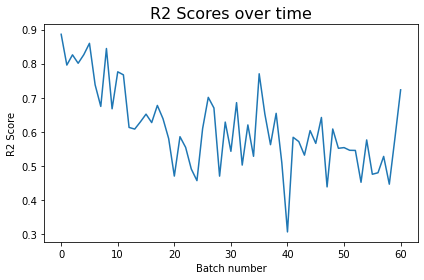

In [78]:
fig, ax = plt.subplots()
ax.plot(range(len(ranges[:-1])),r2_scores)
ax.set_title('R2 Scores over time', fontsize=16)
plt.xlabel('Batch number')
plt.ylabel('R2 Score')
plt.tight_layout()

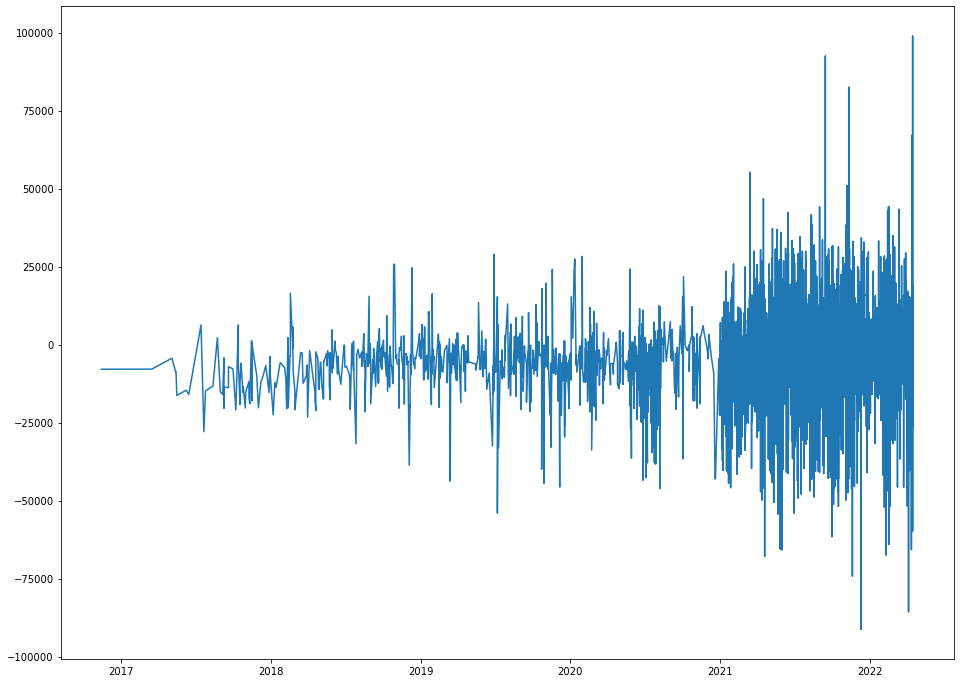

In [34]:
fig, ax = plt.subplots(figsize=(16,12))

base_to_list_df['asklistdiff'] = base_to_list_df['askprice'] - base_to_list_df['baseprice']
plot_list = [(date, diff) for date, diff in zip(base_to_list_df['datelisted'],base_to_list_df['asklistdiff'])]
plot_list = np.asarray(sorted(plot_list, key=lambda x: x[0]))

ax.plot(plot_list[:,0], plot_list[:,1])



In [38]:
base_to_list_df['asklistdiff'] = base_to_list_df['asklistdiff'].astype(float)
base_to_list_df['asklistdiff'] = base_to_list_df['asklistdiff'].astype(float)

In [65]:
base_to_list_df

,askprice,brandname,modelname,year,mileage,datelisted,datesold,engineconfiguration,enginecylinders,enginehp,baseprice,zipcode,dealerid,asklistdiff
15,31000.0,SUBARU,CROSSTREK,2019,33533.0,2022-04-06,2022-04-13,None,4.0,152.0,27195.0,80920,8435,3805.0
24,14999.0,FORD,FOCUS,2017,79650.0,2022-04-05,2022-04-13,In-Line,4.0,160.0,21675.0,80920,8435,-6676.0
39,47989.0,HYUNDAI,PALISADE,2020,42161.0,2022-04-02,2022-04-06,None,None,None,44700.0,80920,8435,3289.0
46,30798.0,TOYOTA,RAV4,2019,38940.0,2022-04-01,2022-04-13,In-Line,4.0,203.0,25650.0,80920,8435,5148.0
57,26999.0,JEEP,CHEROKEE,2019,20221.0,2022-03-31,2022-04-04,In-Line,4.0,184.0,25740.0,80920,8435,1259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88577,31000.0,VOLKSWAGEN,ATLAS,2019,19381.0,2019-03-28,2021-01-13,None,6.0,276.0,35495.0,80014,37030,-4495.0
88578,23997.0,NISSAN,ALTIMA,2019,13143.0,2018-12-01,2021-01-01,None,None,None,32030.0,80014,37030,-8033.0
88579,23797.0,VOLKSWAGEN,TIGUAN,2019,7342.0,2018-11-09,2020-12-18,None,4.0,184.0,26695.0,80014,37030,-2898.0
88581,10996.0,HYUNDAI,SONATA,2017,90543.0,2018-07-12,2021-01-06,None,4.0,187.0,21950.0,80014,37030,-10954.0


In [85]:
craziness = base_to_list_df.groupby([base_to_list_df.datelisted.dt.year,base_to_list_df.datelisted.dt.month, base_to_list_df['brandname']]).mean()

In [87]:
brands = [x for _, _, x in craziness.index]
dates = pd.to_datetime([str(year)+'-'+str(month) for year, month, _ in craziness.index])

In [94]:
craziness.loc[craziness['brand'].isin(['TOYOTA','HONDA','SUBARU','KIA','NISSAN'])]

year       zipcode      dealerid  \
datelisted datelisted brandname                                            
2016       11         HONDA      2017.000000  80121.000000   3245.000000   
2017       11         TOYOTA     2017.000000  80554.428571   6611.000000   
           12         KIA        2017.000000  80504.000000    869.000000   
2018       2          NISSAN     2018.000000  80014.000000  37030.000000   
           3          NISSAN     2018.000000  80014.000000  37030.000000   
           4          TOYOTA     2017.000000  80920.000000   8435.000000   
           5          HONDA      2018.000000  80549.285714  20660.428571   
                      KIA        2017.000000  80033.000000  13661.333333   
                      NISSAN     2018.000000  80014.000000  37030.000000   
                      TOYOTA     2017.500000  80722.500000   5620.000000   
           6          NISSAN     2018.000000  80014.000000  37030.000000   
                      TOYOTA     2017.000000  80525.000000  30589.000000   
           7          SUBARU     2017.000000  81505.000000  19485.000000   
                      TOYOTA     2017.000000  81505.000000  22880.000000   
           8          KIA        2017.000000  80047.200000  18039.000000   
                      NISSAN     2018.000000  80014.000000  37030.000000   
           9          HONDA      2018.000000  80520.500000   5840.000000   
                      NISSAN     2018.000000  80014.000000  37030.000000   
                      TOYOTA     2017.181818  80240.272727  16580.181818   
           10         KIA        2017.000000  80920.000000   8435.000000   
                      NISSAN     2018.000000  80014.000000  37030.000000   
                      TOYOTA     2018.000000  80923.000000  17943.000000   
           11         NISSAN     2018.000000  80051.333333  27726.666667   
                      SUBARU     2017.000000  80983.125000  11834.125000   
           12         KIA        2018.000000  81503.000000  19489.000000   
                      NISSAN     2018.750000  80014.000000  37030.000000   
                      TOYOTA     2018.000000  81505.000000  19485.000000   
2019       1          KIA        2017.000000  81503.000000  19489.000000   
                      SUBARU     2017.000000  80173.000000   4728.000000   
                      TOYOTA     2017.333333  80313.000000  15763.500000   
           2          KIA        2017.000000  81503.000000  19489.000000   
                      TOYOTA     2017.142857  80612.214286  17566.500000   
           3          KIA        2017.666667  81504.333333  24011.333333   
                      NISSAN     2019.000000  80014.000000  37030.000000   
                      SUBARU     2018.000000  80534.800000  17994.400000   
                      TOYOTA     2017.500000  80567.000000   5250.000000   
           4          KIA        2017.000000  80920.000000   8435.000000   
                      NISSAN     2018.000000  80014.000000  37030.000000   
                      SUBARU     2018.000000  80550.777778  17596.111111   
           5          TOYOTA     2017.000000  81416.000000  19514.000000   
           6          KIA        2017.500000  81503.000000  19489.000000   
                      SUBARU     2018.000000  81008.000000  18459.500000   
           7          HONDA      2019.000000  80634.000000   8604.000000   
                      KIA        2019.000000  80234.000000  14122.666667   
           8          NISSAN     2018.000000  81303.000000  23534.000000   
                      TOYOTA     2019.000000  80920.000000   8435.000000   
           9          SUBARU     2018.000000  80777.000000  17275.500000   
                      TOYOTA     2017.000000  80912.500000  17759.500000   
           10         HONDA      2017.000000  80916.666667  32618.666667   
                      NISSAN     2018.000000  80528.800000  24009.600000   
                      SUBARU     2019.000000  80234.000000  19225.000000   
            

In [88]:
craziness['brand'] = brands
craziness['date'] = dates
temp = craziness.reset_index(drop=True).copy()
temp

,year,zipcode,dealerid,asklistdiff,brand,date
0,2017.000000,80121.000000,3245.000000,-7891.000000,HONDA,2016-11-01
1,2017.000000,81505.000000,19485.000000,-7856.000000,FORD,2017-03-01
2,2017.000000,80229.333333,11251.666667,-8654.000000,BMW,2017-05-01
3,2017.000000,80905.000000,8646.000000,-16306.000000,CADILLAC,2017-05-01
4,2017.000000,81505.000000,19485.000000,-4346.000000,FORD,2017-05-01
...,...,...,...,...,...,...
914,2018.411765,80500.605042,18833.899160,621.714286,SUBARU,2022-04-01
915,2018.000000,80172.000000,24147.500000,2369.000000,TESLA,2022-04-01
916,2018.475000,80609.300000,16728.912500,-1135.450000,TOYOTA,2022-04-01
917,2018.452830,80305.415094,19585.245283,-2129.773585,VOLKSWAGEN,2022-04-01


In [57]:
plot_dates = pd.to_datetime([str(year)+'-'+str(month) for year, month in craziness.index])
plot_dates

DatetimeIndex(['2016-11-01', '2017-03-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
      

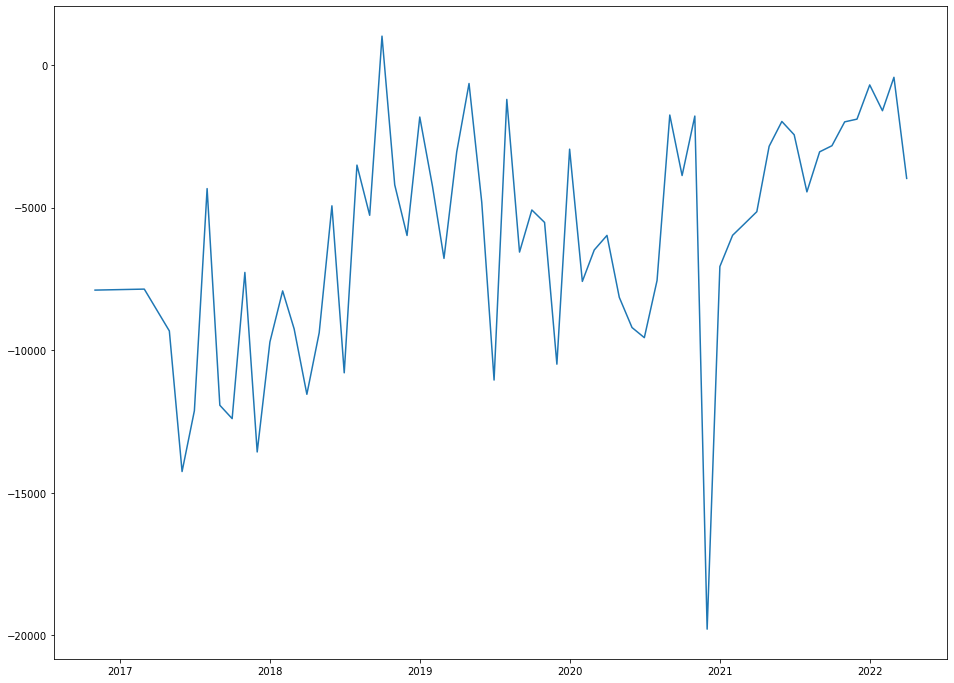

In [58]:
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(plot_dates, craziness['asklistdiff'])

(array([2.38685100e-06, 7.26904624e-06, 1.45380925e-05, 1.63824773e-05,
        2.11561793e-05, 3.40668734e-05, 3.63452312e-05, 5.32701747e-05,
        4.70860607e-05, 5.27277085e-05, 6.36855245e-05, 7.20395030e-05,
        7.38838879e-05, 2.15793029e-04, 9.80778776e-05, 7.75726576e-04,
        2.06820639e-03, 2.19503498e-03, 2.12494835e-03, 1.63813924e-03]),
 array([17017.  , 17121.05, 17225.1 , 17329.15, 17433.2 , 17537.25,
        17641.3 , 17745.35, 17849.4 , 17953.45, 18057.5 , 18161.55,
        18265.6 , 18369.65, 18473.7 , 18577.75, 18681.8 , 18785.85,
        18889.9 , 18993.95, 19098.  ]),
 <BarContainer object of 20 artists>)

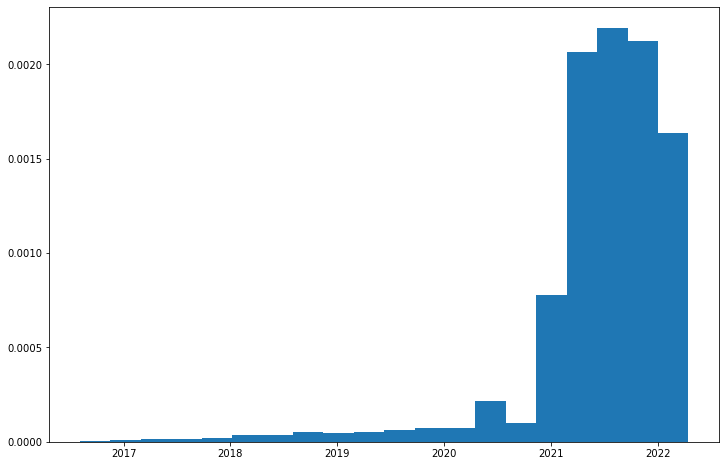

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(sorted(colorado_cars_df['datelisted']), bins=20,density=True)

In [49]:
datetime.datetime.strptime('2021', '%Y')

datetime.datetime(2021, 1, 1, 0, 0)

In [51]:
colorado_cars_df[colorado_cars_df['datelisted'] < datetime.datetime.strptime('2021', '%Y')]

,askprice,brandname,modelname,year,mileage,datelisted,datesold,engineconfiguration,enginecylinders,enginehp,baseprice,zipcode,dealerid
1334,21999.0,TOYOTA,COROLLA,2019,41624.0,2020-12-30,2022-04-07,In-Line,4.0,169.0,0.0,80920,8435
1335,23999.0,FORD,F-150,2012,123773.0,2020-12-18,2022-03-21,V-Shaped,6.0,365.0,0.0,80920,8435
1336,26499.0,DODGE,DURANGO,2016,108794.0,2020-12-06,2022-04-01,None,6.0,None,0.0,80920,8435
1337,22992.0,HONDA,CIVIC,2018,35303.0,2020-12-05,2022-04-09,In-Line,4.0,158.0,21150.0,80920,8435
1338,39799.0,MERCEDES-BENZ,C-CLASS,2017,59474.0,2020-11-18,2022-04-11,V-Shaped,6.0,None,0.0,80920,8435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88579,23797.0,VOLKSWAGEN,TIGUAN,2019,7342.0,2018-11-09,2020-12-18,None,4.0,184.0,26695.0,80014,37030
88580,13900.0,VOLKSWAGEN,JETTA,2014,34375.0,2018-09-14,2020-12-08,None,4.0,140.0,0.0,80014,37030
88581,10996.0,HYUNDAI,SONATA,2017,90543.0,2018-07-12,2021-01-06,None,4.0,187.0,21950.0,80014,37030
88582,12997.0,NISSAN,SENTRA,2017,21784.0,2018-06-27,2021-01-02,In-Line,4.0,130.0,0.0,80014,37030
